## **Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê!**

### **STEP 1 : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Samsung)**
* ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
* ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
* Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)

In [1]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# DataFrameÏúºÎ°ú Î≥ÄÌôò
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-05-18  47950.0  49100.0  47600.0  48800.0  46788.835938  20481981
2020-05-19  50100.0  50500.0  49700.0  50300.0  48227.015625  25168295
2020-05-20  50000.0  50200.0  49800.0  50000.0  47939.382813  14896899
2020-05-21  50300.0  50400.0  49850.0  49950.0  47891.437500  14949266
2020-05-22  49600.0  49800.0  48600.0  48750.0  46740.894531  19706284

In [3]:
# Time Series ÏÉùÏÑ±
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

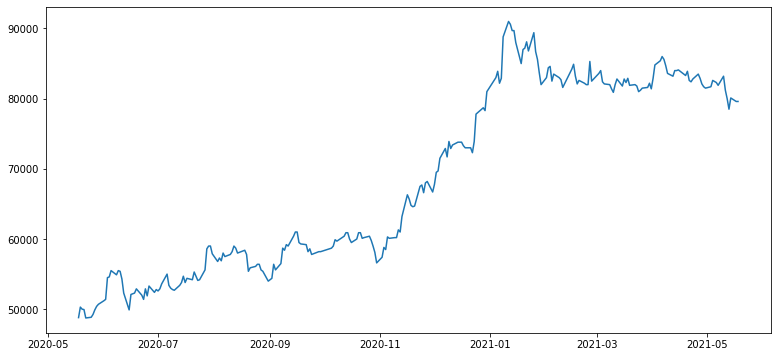

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6
plt.plot(ts)

### **STEP 2 : Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ**
* Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
* Î°úÍ∑∏ Î≥ÄÌôò

In [5]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()] # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•ÌïúÎã§.

Series([], Name: Close, dtype: float64)

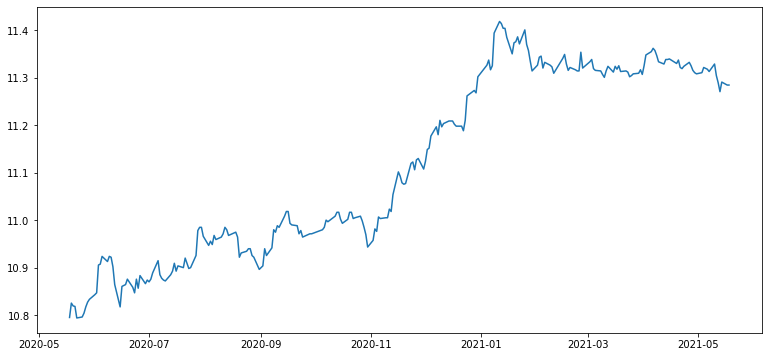

In [6]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)
plt.plot(ts_log)

### **STEP 3 : ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù**
* Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
* Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
* ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
* Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

In [7]:
# Íµ¨Í∞Ñ ÌÜµÍ≥ÑÏπò(Rolling Statistics) Ï†ïÏùò
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std() # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

    # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

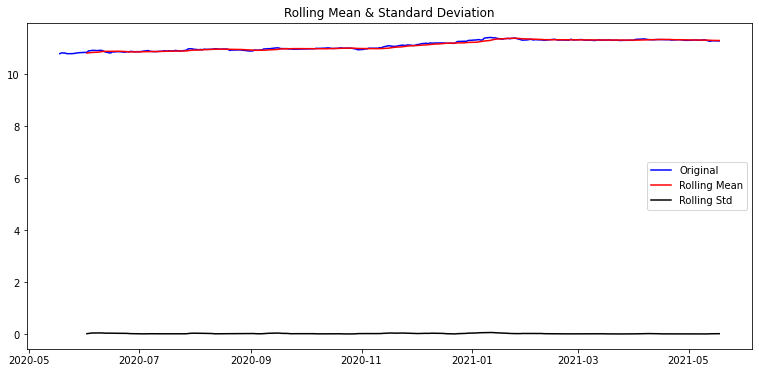

In [8]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

In [9]:
# Augmented Dickey-Fuller Test Ï†ïÏùò
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌïúÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÜåÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•ÌïúÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [10]:
# Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


**p-valueÍ∞Ä 0.05 Ïù¥ÏÉÅÏúºÎ°ú Ìï¥Îãπ ÏãúÍ≥ÑÏó¥Ïù¥ ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏóÜÎã§.**

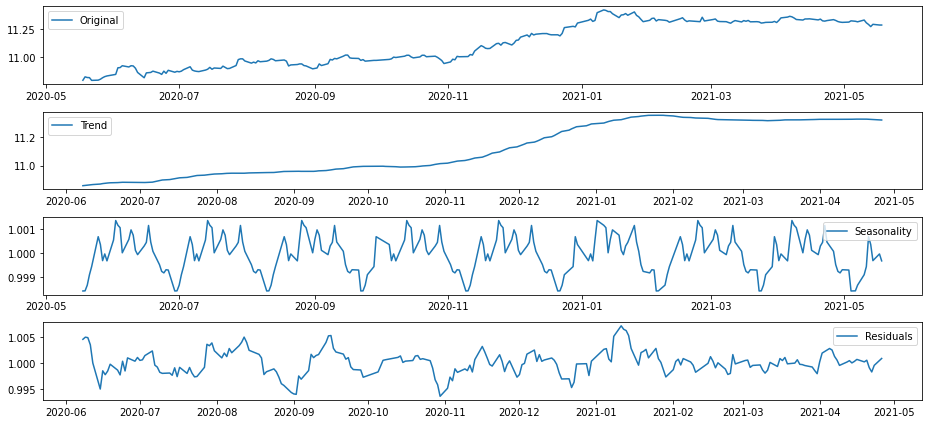

In [11]:
# ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


**ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ p-valueÎ•º Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏúºÎØÄÎ°ú ÏòàÏ∏° Í∞ÄÎä•Ìïú ÏàòÏ§ÄÏùò ÏïàÏ†ïÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ ÏñªÏñ¥Ï°åÎã§Í≥† Î≥º Ïàò ÏûàÎã§.**

### **STEP 4 : ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±**
* ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

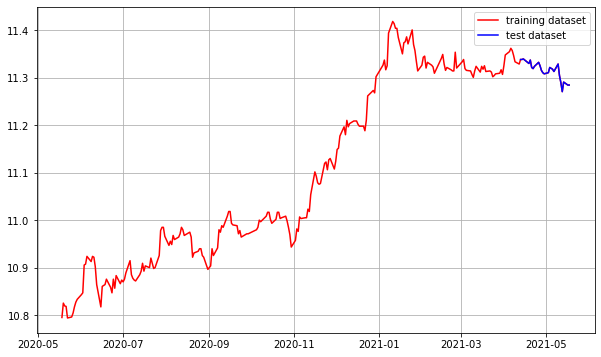

In [13]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset') # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### **STEP 5 : Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞**
* ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p, q Íµ¨ÌïòÍ∏∞
* Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

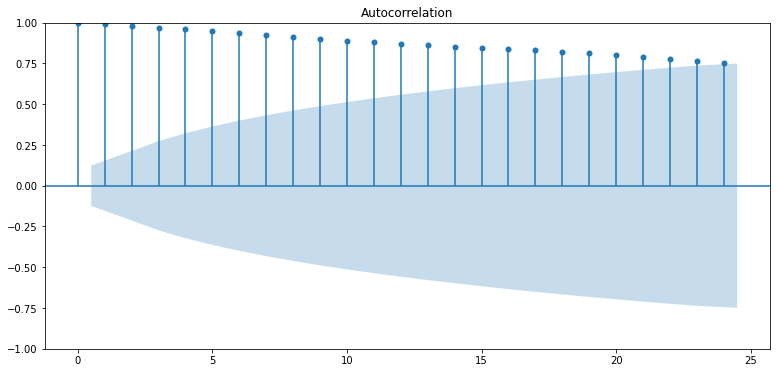

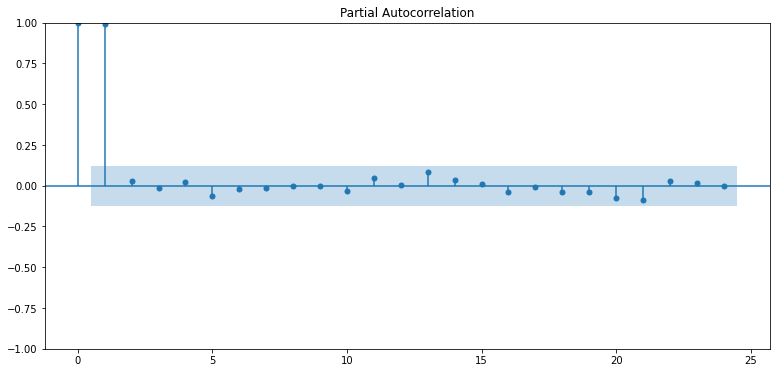

In [14]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log) # ACF: Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log, method='ywm') # PACF: Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

ACFÎäî Ï≤úÏ≤úÌûà Í∞êÏÜåÌïòÍ≥† PACFÎäî lag 1 Ïù¥ÌõÑÏóê Í∏âÍ≤©ÌïòÍ≤å ÌïòÎùΩÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.
<br>**Îî∞ÎùºÏÑú AR(1) Î™®Îç∏Ïù¥ Ï†ÅÌï©Ìï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.**

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


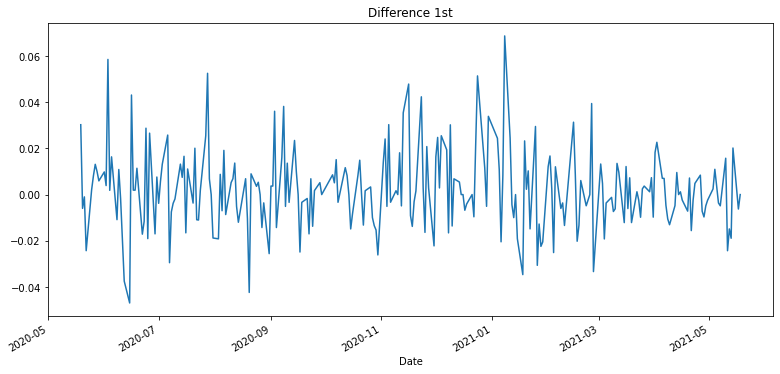

In [15]:
# 1Ï∞® Ï∞®Î∂Ñ
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

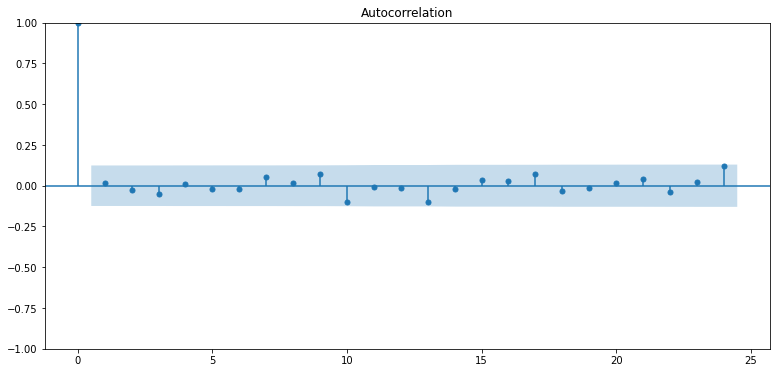

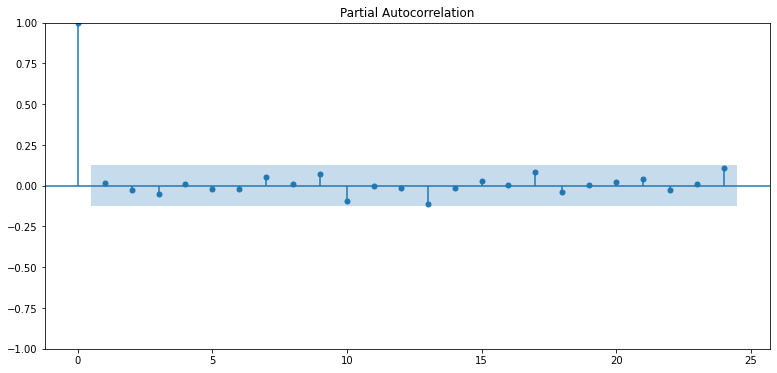

In [16]:
# 1Ï∞® Ï∞®Î∂Ñ ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(diff_1) # ACF: Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(diff_1, method='ywm') # PACF: Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

1Ï∞® Ï∞®Î∂ÑÎßåÏúºÎ°úÎèÑ Ï∂©Î∂ÑÌûà ÏïàÏ†ïÌôîÎêú Í∑∏ÎûòÌîÑÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏñ¥ 2Ï∞® Ï∞®Î∂ÑÏùÄ ÏßÑÌñâÌïòÏßÄ ÏïäÍ∏∞Î°ú ÌñàÎã§.
<br>**ARIMA(1,0,q)ÏôÄ ARIMA(1,1,q) Î™®Îç∏ÏùÑ Ï†ÅÏö©ÏãúÏºúÎ≥¥Ïûê. (q = 0, q = 1, q = 2)**

### **STEP 6 : ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏**
* ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
* Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
* ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

#### **ARIMA(1,0,0)**

In [17]:
import warnings
warnings.filterwarnings('ignore') # Í≤ΩÍ≥† Î¨¥Ïãú

from statsmodels.tsa.arima.model import ARIMA

# Build and Train Model
model = ARIMA(train_data, order=(1,0,0))
fitted_m = model.fit()
print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 583.082
Date:                Sun, 16 Apr 2023   AIC                          -1160.164
Time:                        08:12:45   BIC                          -1149.916
Sample:                             0   HQIC                         -1156.028
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.115     96.195      0.000      10.864      11.316
ar.L1          0.9937      0.006    168.571      0.000       0.982       1.005
sigma2         0.0003   2.45e-05     13.135      0.0

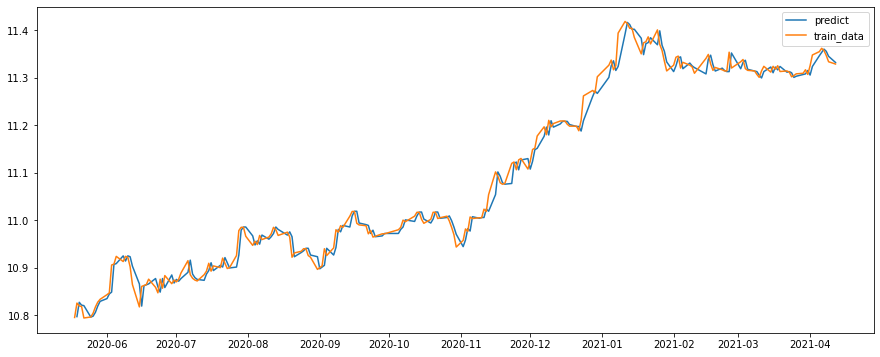

In [18]:
# ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fitted_m_predict = fitted_m.predict()
fitted_m_predict = fitted_m_predict.drop(fitted_m_predict.index[0])
plt.figure(figsize=(15, 6))
plt.plot(fitted_m_predict, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

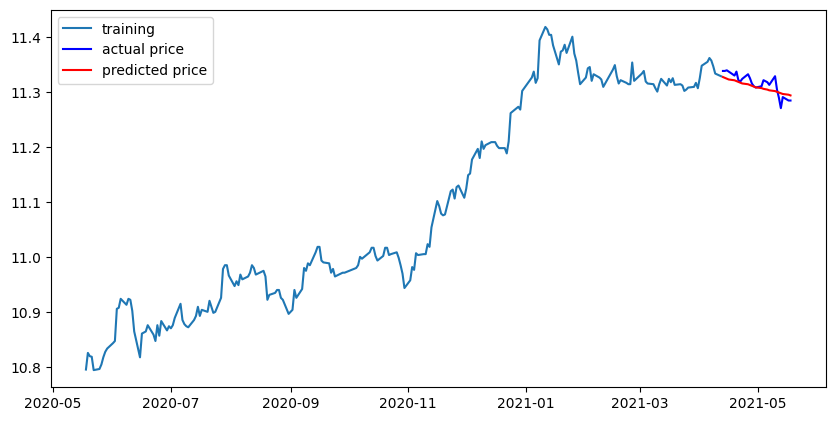

In [19]:
# Forecast: Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥Í∏¥Îã§.
fc = fitted_m.forecast(len(test_data), alpha=0.05) # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index) # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data)) / np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  1078734.6873192338
MAE:  866.9125685447763
RMSE:  1038.621532281723
MAPE: 1.05%


#### **(Ï∂îÍ∞Ä) Î™®Îç∏ ÏÑ±Îä• Ï∏°Ï†ï Ìï®Ïàò Ï†ïÏùò**

In [21]:
def arima_result(p,d,q):
    
    # 1. ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
    model = ARIMA(train_data, order=(p,d,q))
    fitted_m = model.fit()
    print(fitted_m.summary())
    
    # 2. ARIMA Î™®Îç∏ ÌõàÎ†® Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    fitted_m_predict = fitted_m.predict()
    fitted_m_predict = fitted_m_predict.drop(fitted_m_predict.index[0])
    plt.figure(figsize=(15, 6))
    plt.plot(fitted_m_predict, label='predict')
    plt.plot(train_data, label='train_data')
    plt.legend()
    
    # 3. Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
    # Forecast
    fc = fitted_m.forecast(len(test_data), alpha=0.05) 
    fc = np.array(fc)

    # Make as pandas series
    fc_series = pd.Series(fc, index=test_data.index)

    # Plot
    plt.figure(figsize=(10, 5), dpi=100)
    plt.plot(train_data, label='training')
    plt.plot(test_data, c='b', label='actual price')
    plt.plot(fc_series, c='r',label='predicted price')
    plt.legend()
    plt.show()
    
    # 4. ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)
    mse = mean_squared_error(np.exp(test_data), np.exp(fc))
    print('MSE: ', mse)

    mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
    print('MAE: ', mae)

    rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
    print('RMSE: ', rmse)

    mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data)) / np.abs(np.exp(test_data)))
    print('MAPE: {:.2f}%'.format(mape * 100))

#### **ARIMA(1,0,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 583.370
Date:                Sun, 16 Apr 2023   AIC                          -1158.741
Time:                        08:12:46   BIC                          -1145.076
Sample:                             0   HQIC                         -1153.226
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.127     87.360      0.000      10.841      11.338
ar.L1          0.9942      0.006    157.934      0.000       0.982       1.007
ma.L1          0.0392      0.063      0.623      0.5

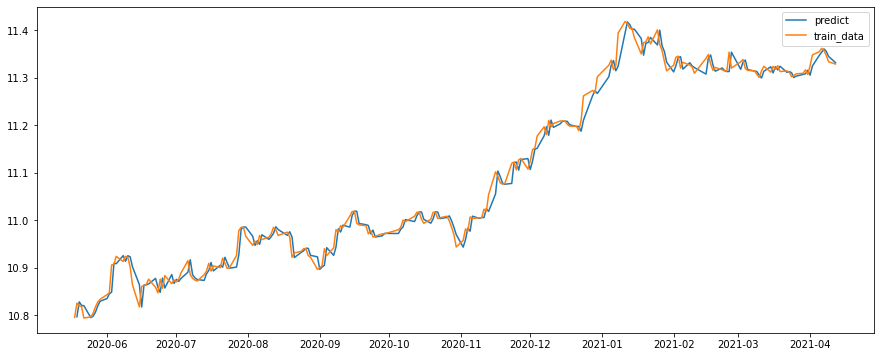

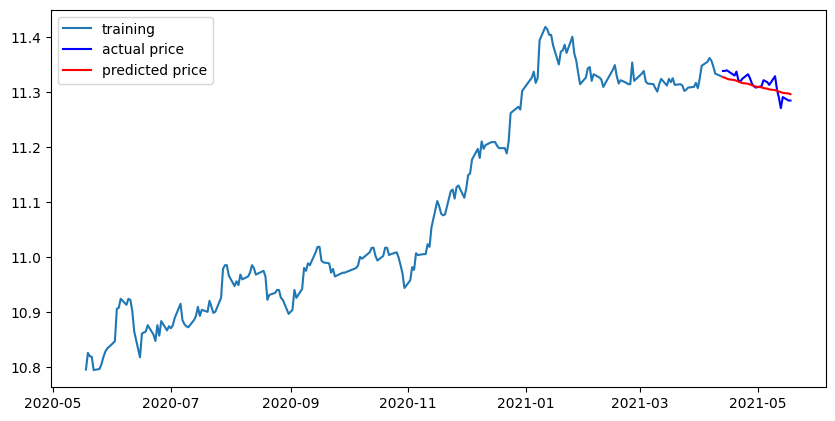

MSE:  1057119.8161340475
MAE:  850.8270312480739
RMSE:  1028.1633217218202
MAPE: 1.04%


In [22]:
arima_result(1,0,1)

#### **ARIMA(1,0,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 583.245
Date:                Sun, 16 Apr 2023   AIC                          -1156.491
Time:                        08:12:47   BIC                          -1139.410
Sample:                             0   HQIC                         -1149.597
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0713      0.109    101.360      0.000      10.857      11.285
ar.L1          0.9933      0.006    157.081      0.000       0.981       1.006
ma.L1          0.0460      0.063      0.729      0.4

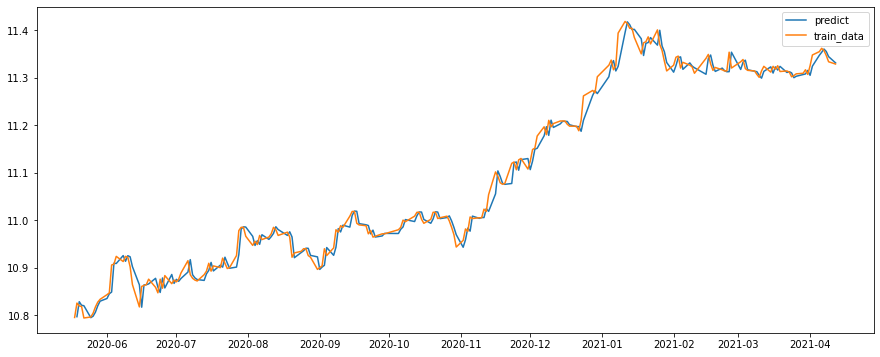

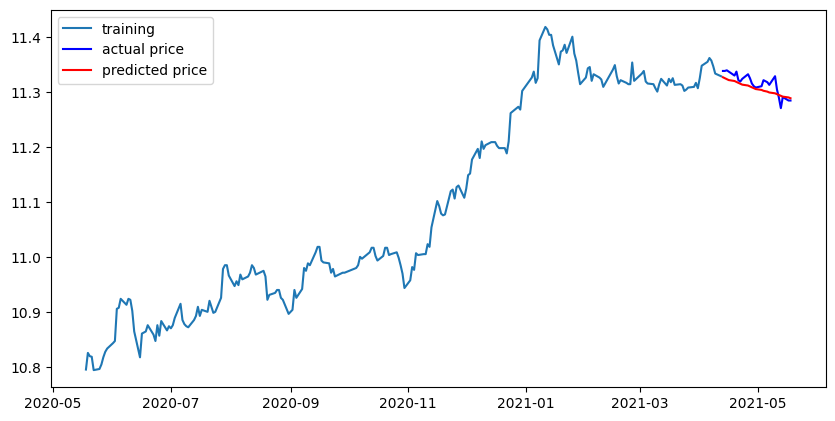

MSE:  1248344.6362079717
MAE:  943.2987087532284
RMSE:  1117.2934423006213
MAPE: 1.14%


In [23]:
arima_result(1,0,2)

#### **ARIMA(1,1,0)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 583.488
Date:                Sun, 16 Apr 2023   AIC                          -1162.976
Time:                        08:12:48   BIC                          -1156.153
Sample:                             0   HQIC                         -1160.222
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0333      0.061      0.545      0.586      -0.086       0.153
sigma2         0.0003   2.42e-05     13.219      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.06   Jarque-

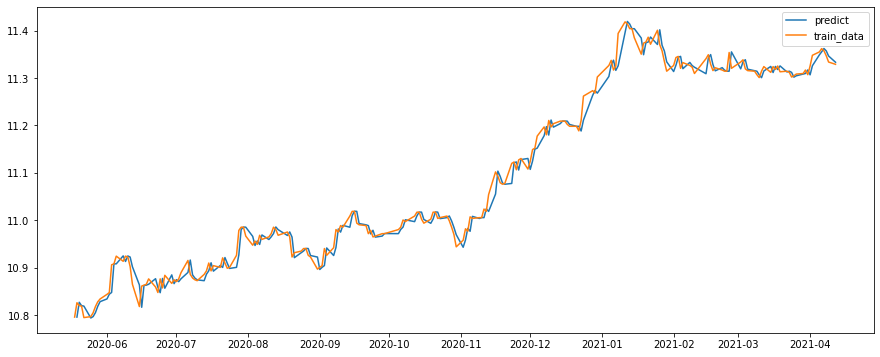

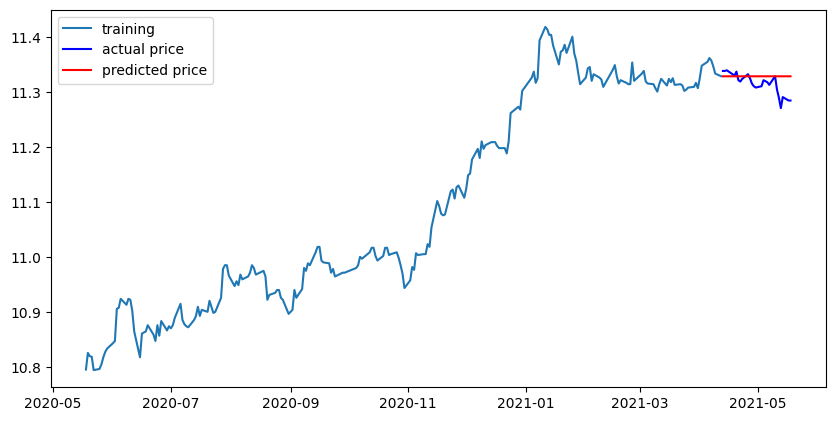

MSE:  3480513.747715865
MAE:  1403.033723618997
RMSE:  1865.6135043775453
MAPE: 1.74%


In [24]:
arima_result(1,1,0)

#### **ARIMA(1,1,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 583.489
Date:                Sun, 16 Apr 2023   AIC                          -1160.979
Time:                        08:12:49   BIC                          -1150.744
Sample:                             0   HQIC                         -1156.847
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0126      2.094      0.006      0.995      -4.092       4.117
ma.L1          0.0237      2.102      0.011      0.991      -4.096       4.143
sigma2         0.0003   2.47e-05     12.936      0.0

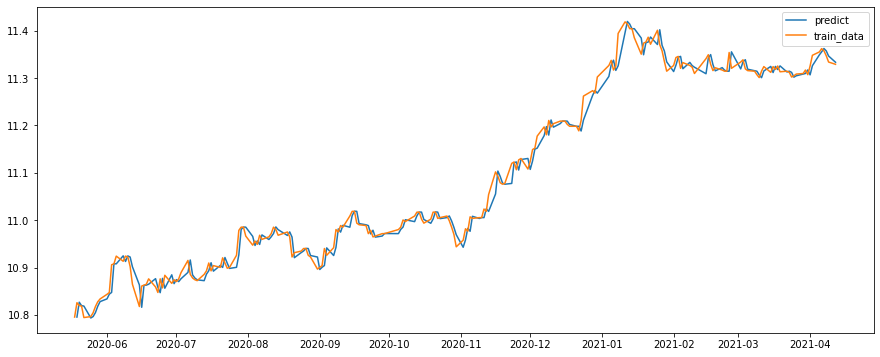

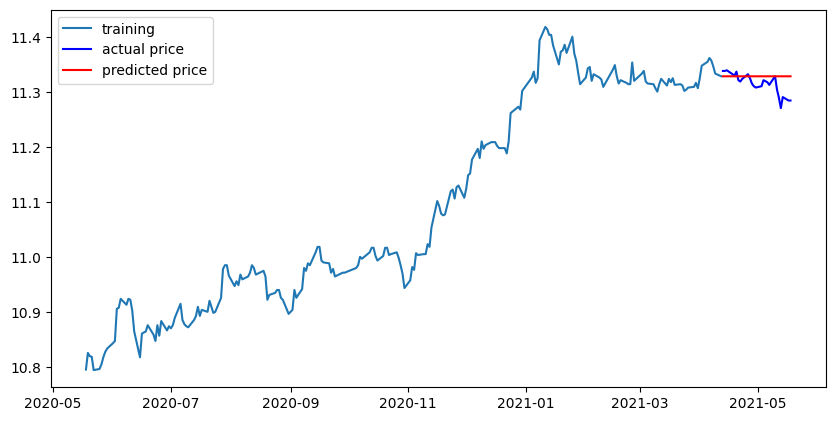

MSE:  3480580.457711579
MAE:  1403.0537770723201
RMSE:  1865.631383127862
MAPE: 1.74%


In [25]:
arima_result(1,1,1)

#### **ARIMA(1,1,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 583.491
Date:                Sun, 16 Apr 2023   AIC                          -1158.981
Time:                        08:12:50   BIC                          -1145.334
Sample:                             0   HQIC                         -1153.473
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2891     45.612     -0.006      0.995     -89.687      89.109
ma.L1          0.3205     45.621      0.007      0.994     -89.096      89.737
ma.L2          0.0105      1.421      0.007      0.9

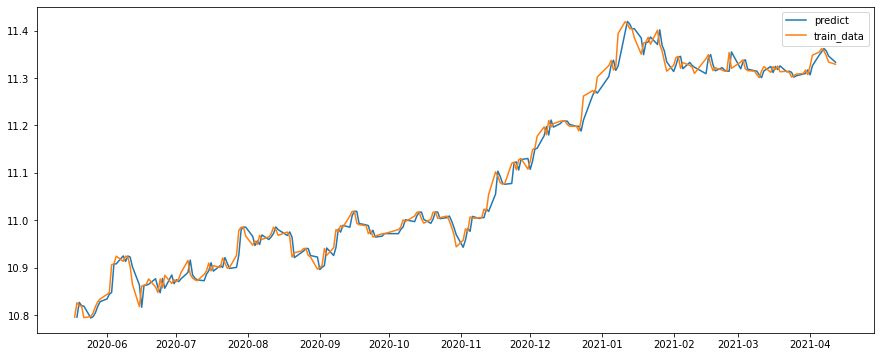

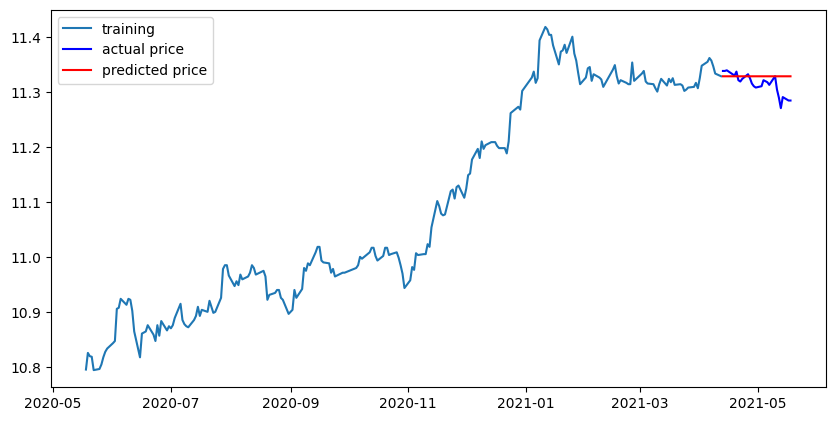

MSE:  3482473.446381117
MAE:  1403.3802095638152
RMSE:  1866.1386460767371
MAPE: 1.74%


In [26]:
arima_result(1,1,2)

#### **ARIMA(2,0,0)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 583.409
Date:                Sun, 16 Apr 2023   AIC                          -1158.817
Time:                        08:12:50   BIC                          -1145.153
Sample:                             0   HQIC                         -1153.302
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.132     83.895      0.000      10.831      11.349
ar.L1          1.0296      0.061     16.764      0.000       0.909       1.150
ar.L2         -0.0350      0.062     -0.562      0.5

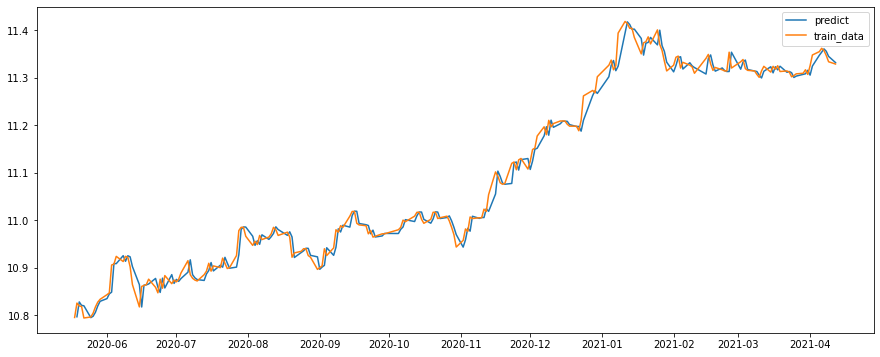

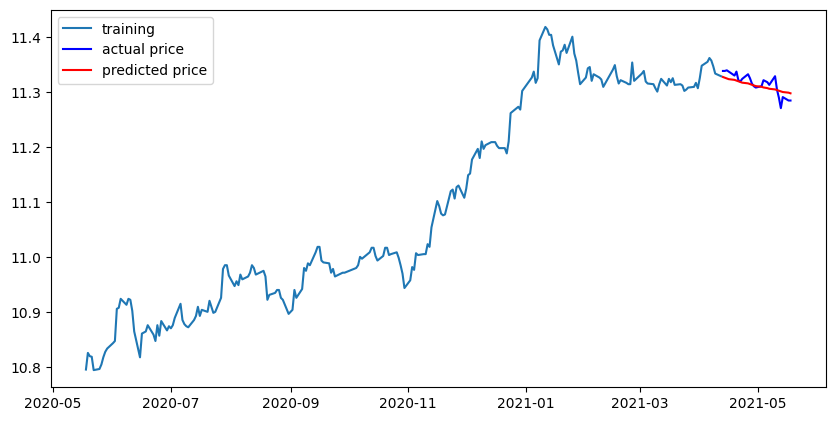

MSE:  1052831.3953688445
MAE:  840.325291750654
RMSE:  1026.0757259427028
MAPE: 1.02%


In [27]:
arima_result(2,0,0)

#### **ARIMA(2,0,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Sun, 16 Apr 2023   AIC                          -1156.722
Time:                        08:12:51   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

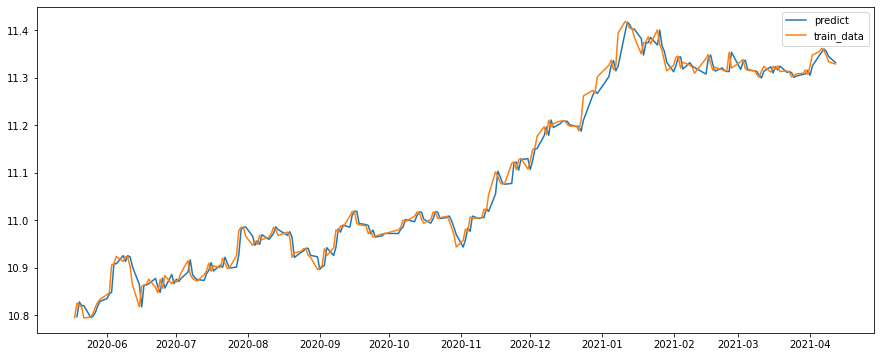

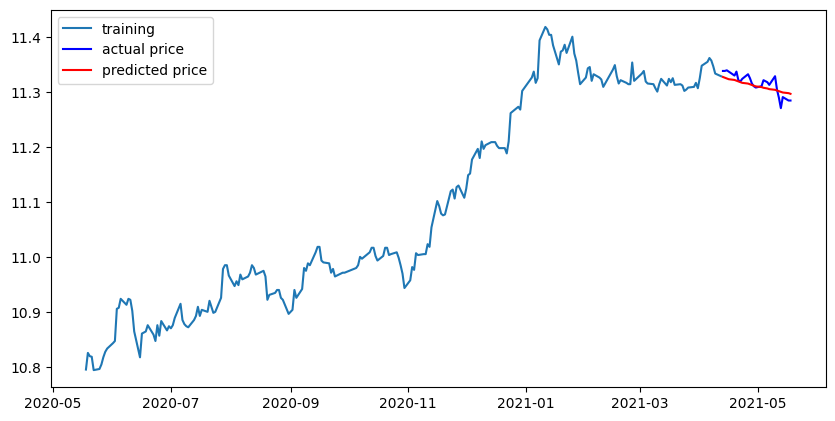

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


In [28]:
arima_result(2,0,1)

#### **ARIMA(2,0,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 583.607
Date:                Sun, 16 Apr 2023   AIC                          -1155.215
Time:                        08:12:53   BIC                          -1134.718
Sample:                             0   HQIC                         -1146.942
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0688      0.196     56.407      0.000      10.684      11.453
ar.L1          0.2660     32.234      0.008      0.993     -62.911      63.443
ar.L2          0.7287     32.134      0.023      0.9

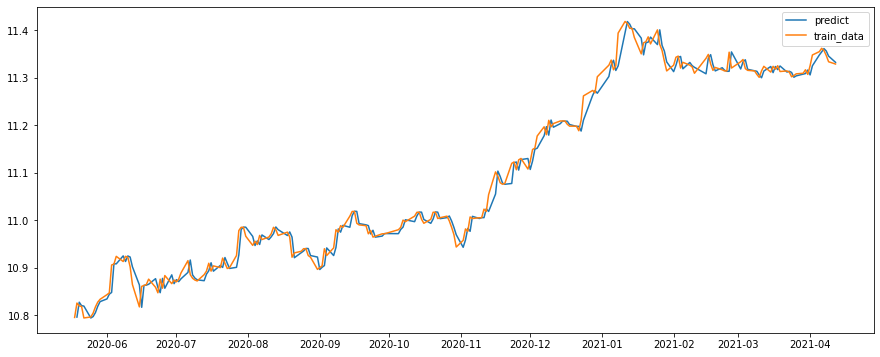

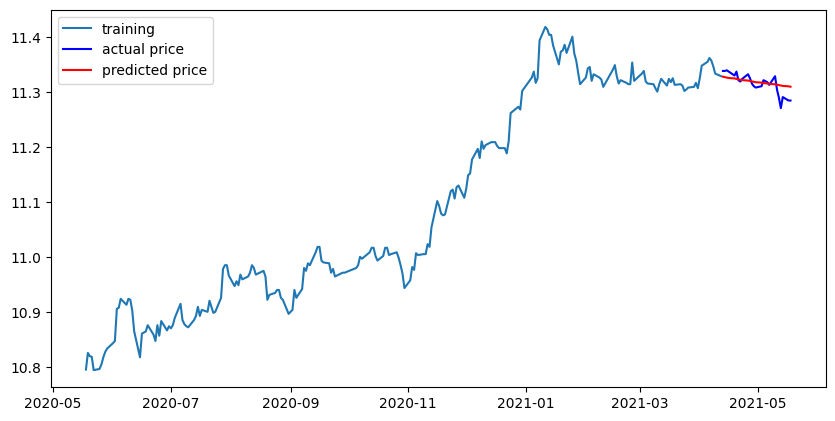

MSE:  1427822.3540262028
MAE:  933.7248352184944
RMSE:  1194.9152078813804
MAPE: 1.15%


In [29]:
arima_result(2,0,2)

|p|d|q|MAPE(%)|
|------|---|---|---|
|1|0|0|1.05|
|1|0|1|1.04|
|1|0|2|1.14|
|1|1|0|1.74|
|1|1|1|1.74|
|1|1|2|1.74|
|2|0|0|1.02|
|2|0|1|1.03|
|2|0|2|1.15|

**ARIMA(2,0,0) Î™®Îç∏Ïù¥ MAPE 1.02%Î°ú Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

### **STEP 7 : Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞**
* Í¥ÄÏã¨ Ï¢ÖÎ™©ÏùÑ Í≥®Îùº ÏúÑ STEP 1~6Ïùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï¥ Î≥¥Í∏∞

### **APPLE üçé**
#### **1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ** 

In [30]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨ÏôÄÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-12  168.020004  169.869995  166.639999  167.660004  166.650482   
2022-04-13  167.389999  171.039993  166.770004  170.399994  169.373962   
2022-04-14  170.619995  171.270004  165.039993  165.289993  164.294754   
2022-04-18  163.919998  166.600006  163.570007  165.070007  164.076080   
2022-04-19  165.020004  167.820007  163.910004  167.399994  166.392044   

              Volume  
Date                  
2022-04-12  79265200  
2022-04-13  70618900  
2022-04-14  75329400  
2022-04-18  69023900  
2022-04-19  67723800

In [31]:
# Time Series ÏÉùÏÑ±
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2022-04-12    167.660004
2022-04-13    170.399994
2022-04-14    165.289993
2022-04-18    165.070007
2022-04-19    167.399994
Name: Close, dtype: float64

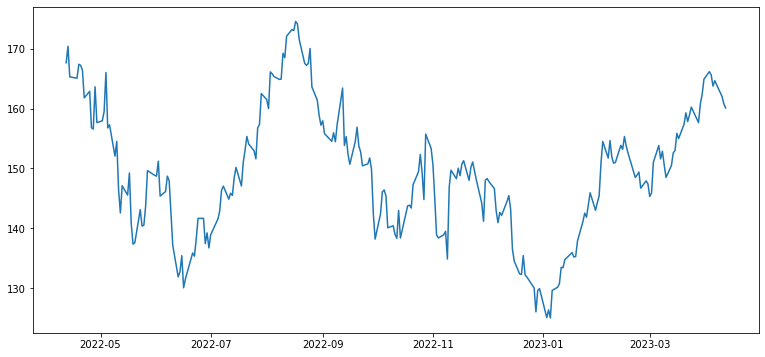

In [32]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
rcParams['figure.figsize'] = 13, 6
plt.plot(ts)

#### **2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ**

In [33]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

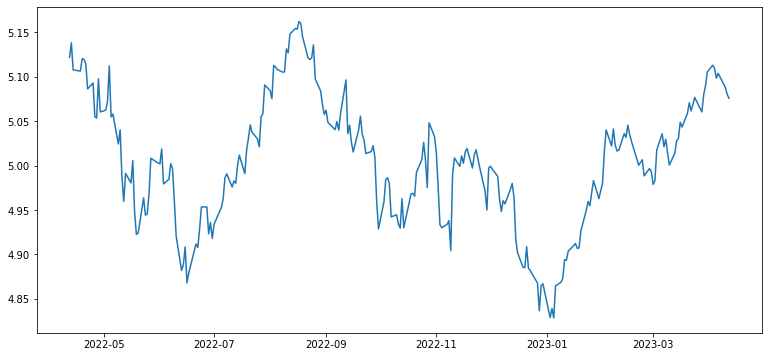

In [34]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)
plt.plot(ts_log)

#### **3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù**

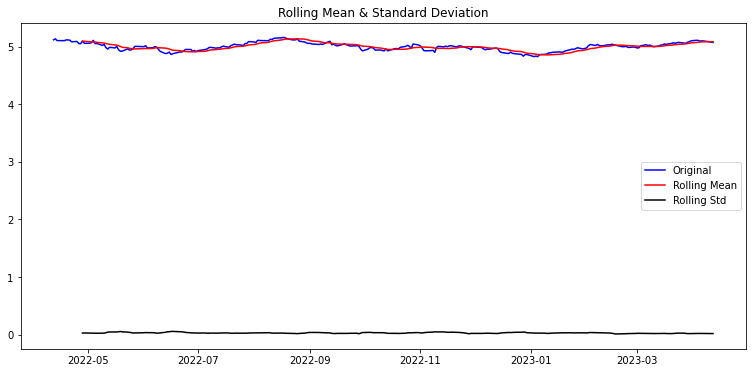

Results of Dickey-Fuller Test:
Test Statistic                  -2.588455
p-value                          0.095407
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


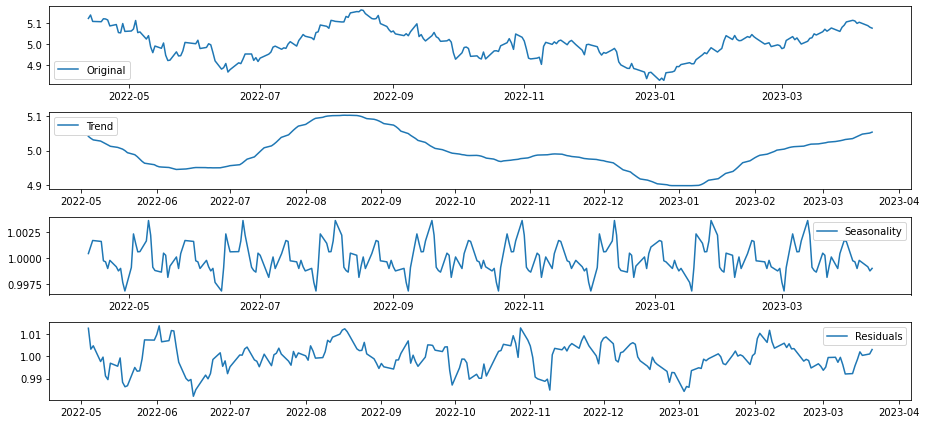

In [35]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

# Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [36]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.036794
p-value                          0.000019
#Lags Used                       5.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú residualÏù¥ autocorrelationÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÎã§.
<br>**Îî∞ÎùºÏÑú residualÏùò ÏïàÏ†ïÏÑ±Ïù¥ Í¥úÏ∞ÆÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÎã§.**

#### **4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±**

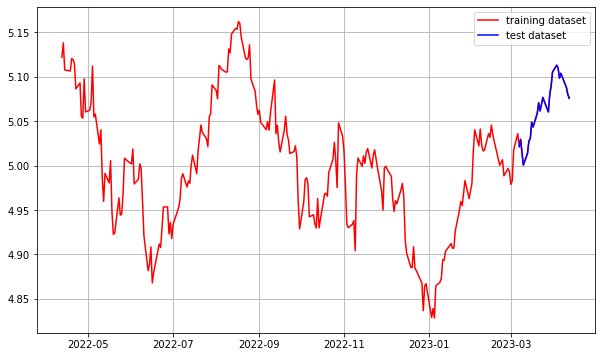

In [37]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

#### **5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞**

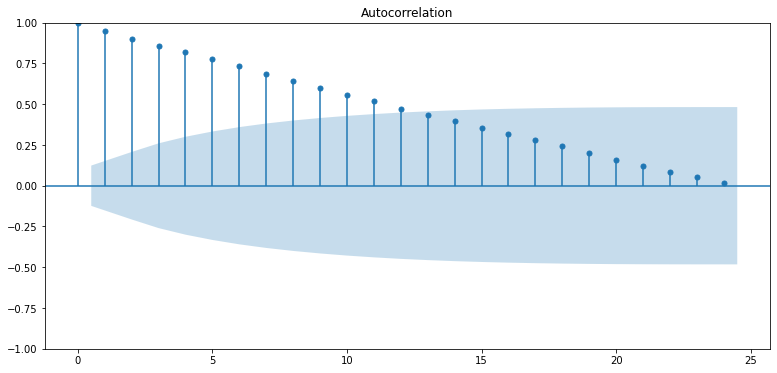

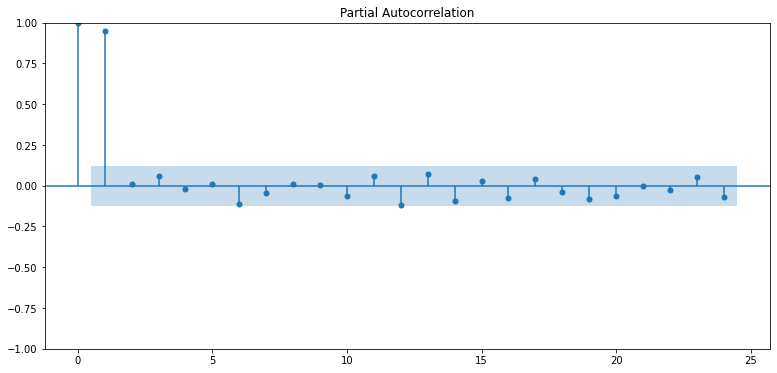

In [38]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(ts_log)  
plot_pacf(ts_log, method='ywm')
plt.show()

ACFÍ∞Ä Ï≤úÏ≤úÌûà Í∞êÏÜåÌïòÍ≥† PACFÍ∞Ä lag 1 Ïù¥ÌõÑ Í∏âÍ≤©ÌïòÍ≤å ÌïòÎùΩÌïòÎäî Ìå®ÌÑ¥ÏúºÎ°ú AR Î™®Îç∏Ïùò Ï†ÅÌï©ÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.
<br>**Ïù¥Ï†ÑÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú AR(1) Î™®Îç∏Ïù¥ Í∞ÄÏû• Ï†ÅÌï©Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêúÎã§.**

Results of Dickey-Fuller Test:
Test Statistic                -1.676274e+01
p-value                        1.306116e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


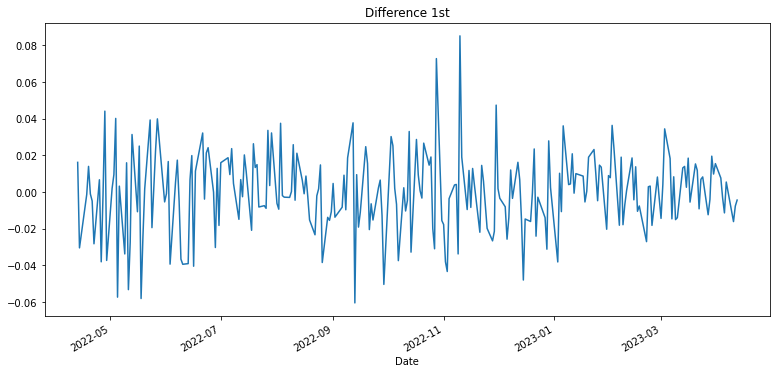

In [39]:
# 1Ï∞® Ï∞®Î∂Ñ
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

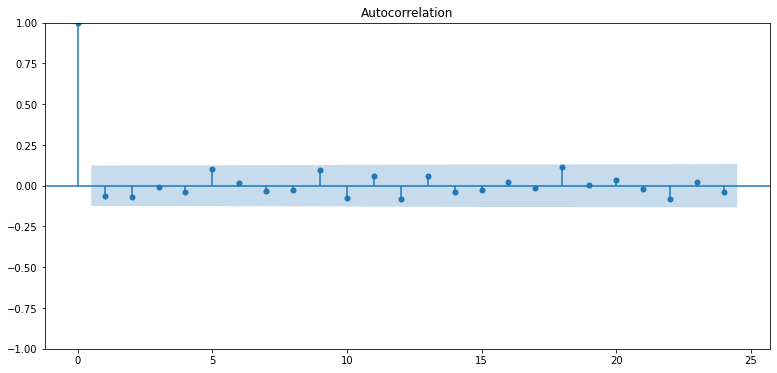

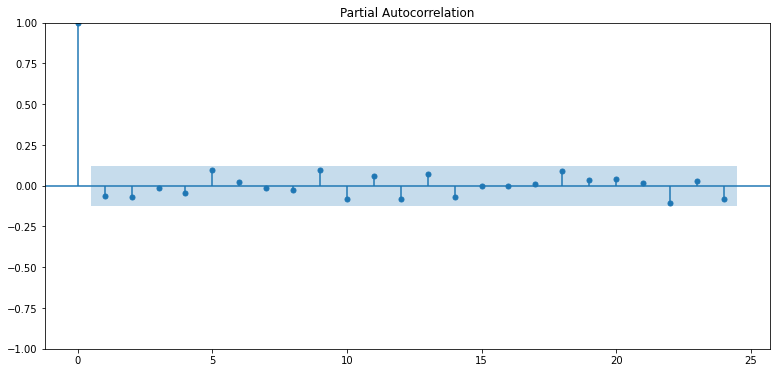

In [40]:
# 1Ï∞® Ï∞®Î∂Ñ ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(diff_1) # ACF: Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(diff_1, method='ywm') # PACF: Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

**ARIMA(1,1,0)ÏúºÎ°ú ÏãúÏûëÌï¥ÏÑú Í∞íÏùÑ ÌïòÎÇòÏî© Î≥ÄÍ≤ΩÌï¥Î≥¥Î©∞ Ï†ÅÎãπÌïú Î™®ÏàòÎ•º Ï∞æÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÏûê!**

#### **6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏**

#### **ARIMA(1,1,0)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 531.635
Date:                Sun, 16 Apr 2023   AIC                          -1059.270
Time:                        08:12:57   BIC                          -1052.446
Sample:                             0   HQIC                         -1056.516
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0654      0.065     -1.011      0.312      -0.192       0.061
sigma2         0.0005   4.48e-05     11.342      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

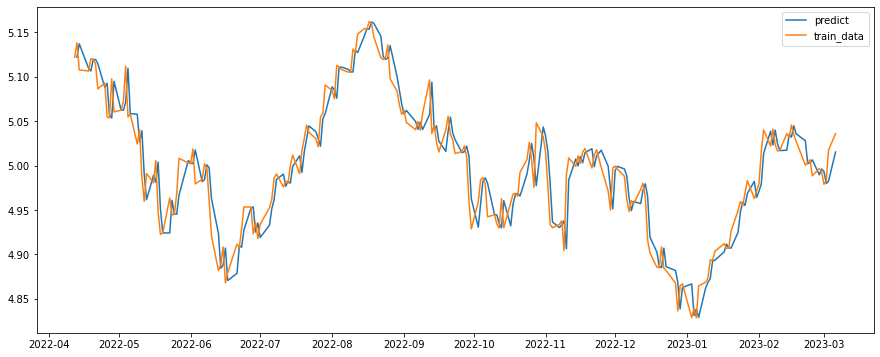

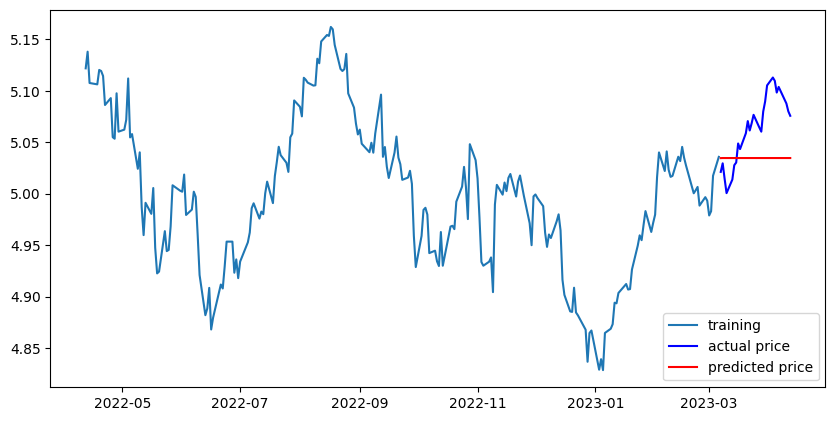

MSE:  44.97477939865693
MAE:  5.698108810499951
RMSE:  6.706323836399263
MAPE: 3.55%


In [41]:
arima_result(1,1,0)

#### **ARIMA(1,1,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 531.921
Date:                Sun, 16 Apr 2023   AIC                          -1057.843
Time:                        08:12:57   BIC                          -1047.608
Sample:                             0   HQIC                         -1053.712
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6199      0.388      1.597      0.110      -0.141       1.380
ma.L1         -0.6885      0.361     -1.910      0.056      -1.395       0.018
sigma2         0.0005   4.46e-05     11.363      0.0

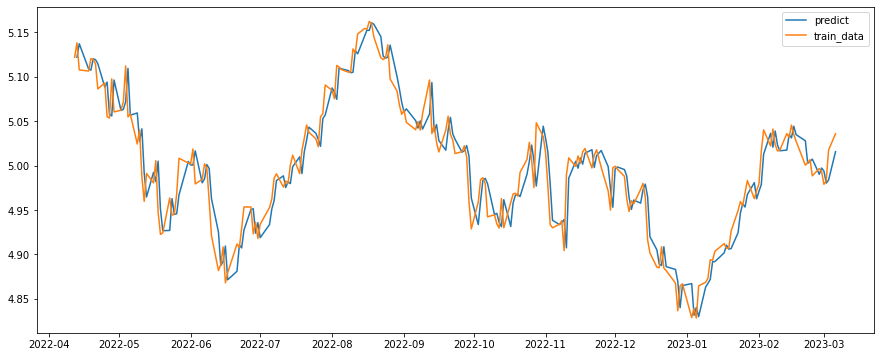

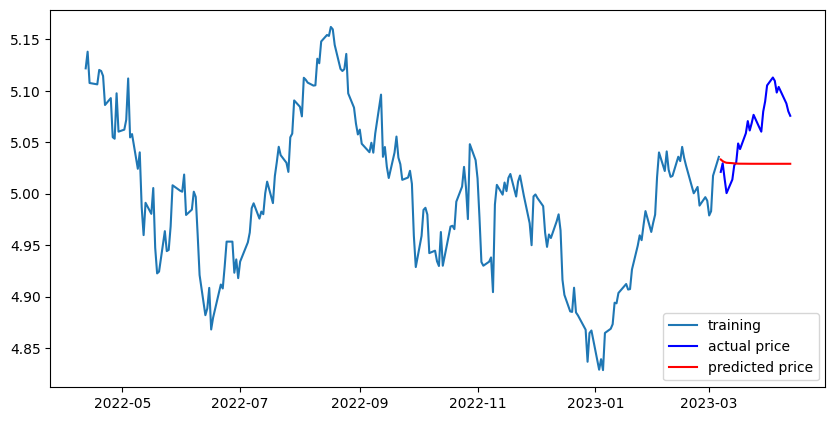

MSE:  53.54599433771054
MAE:  6.165986107208236
RMSE:  7.317512851899239
MAPE: 3.83%


In [42]:
arima_result(1,1,1)

#### **ARIMA(1,1,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 532.306
Date:                Sun, 16 Apr 2023   AIC                          -1056.612
Time:                        08:12:58   BIC                          -1042.965
Sample:                             0   HQIC                         -1051.104
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3741      0.743     -0.503      0.615      -1.831       1.083
ma.L1          0.3022      0.737      0.410      0.682      -1.142       1.747
ma.L2         -0.1027      0.068     -1.511      0.1

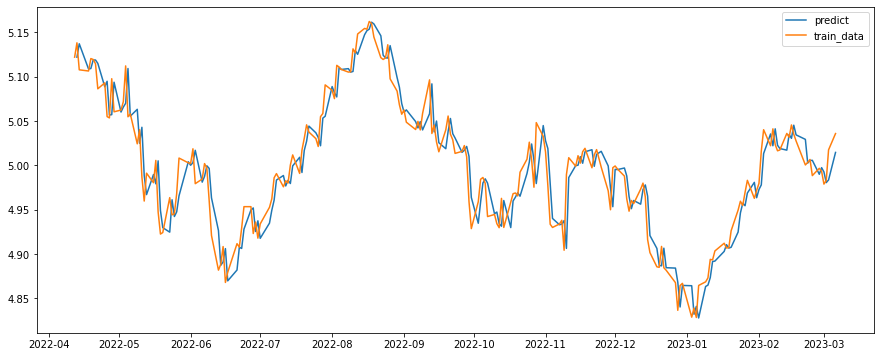

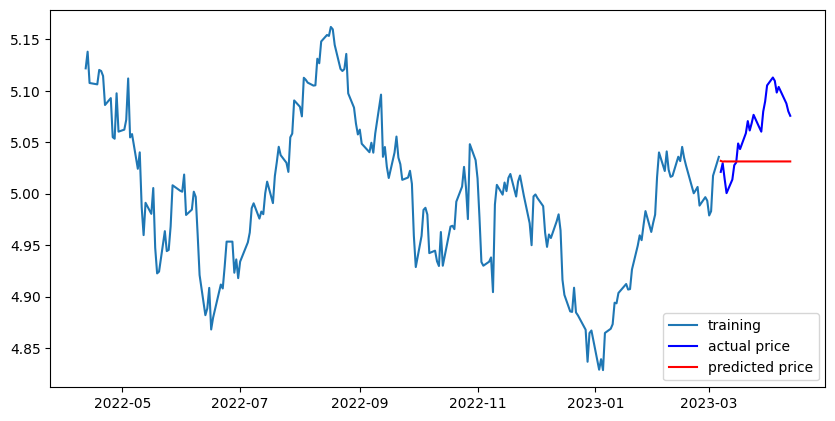

MSE:  49.7918260497391
MAE:  5.935540163327032
RMSE:  7.056332336967917
MAPE: 3.69%


In [43]:
arima_result(1,1,2)

#### **ARIMA(1,2,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 529.061
Date:                Sun, 16 Apr 2023   AIC                          -1050.121
Time:                        08:13:00   BIC                          -1036.492
Sample:                             0   HQIC                         -1044.619
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9117      0.039    -23.381      0.000      -0.988      -0.835
ma.L1         -0.0102      5.381     -0.002      0.998     -10.556      10.536
ma.L2         -0.9897      5.325     -0.186      0.8

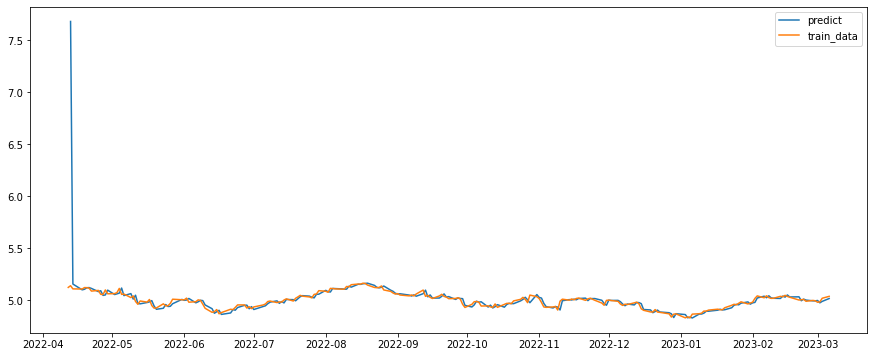

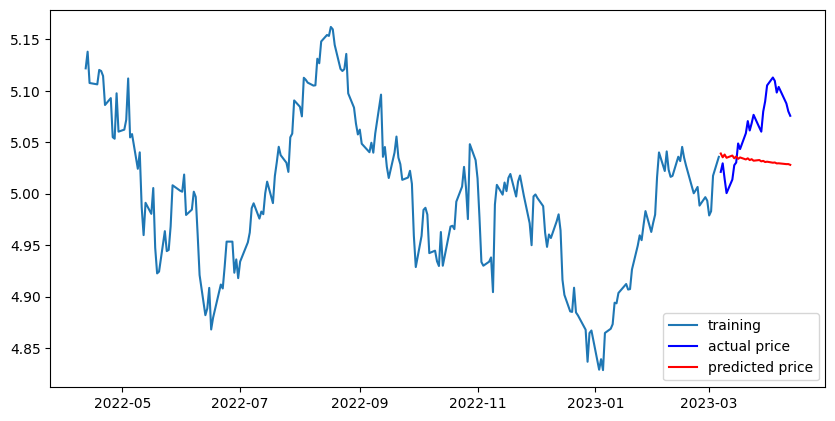

MSE:  51.5833267891702
MAE:  6.129258179646261
RMSE:  7.182153353220063
MAPE: 3.82%


In [44]:
arima_result(1,2,2)

predicted priceÏôÄ actual priceÏùò ÏÑ†Ïù¥ ÍµâÏû•Ìûà Ïñ¥Í∏ãÎÇú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
<br>MAPE Ï†êÏàòÏóêÎäî ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎäîÎç∞ Í∑∏ÎûòÌîÑÏóêÏÑúÎäî ÌÅ∞ Ï∞®Ïù¥Í∞Ä Î≥¥Ïù¥Îäî Ïù¥Ïú†Îäî Î≠òÍπå...?
<br>ARIMA(1,1,1)Î≥¥Îã§ MAPEÍ∞Ä 0.01% Ï†ÅÍ≤å ÎÇòÏôîÎäîÎç∞ÎèÑ Í∑∏ÎûòÌîÑÏùò ÏÑ†ÏùÄ Îçî ÎßûÏßÄ ÏïäÎäîÎã§.

#### **ARIMA(1,3,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 3, 2)   Log Likelihood                 516.613
Date:                Sun, 16 Apr 2023   AIC                          -1025.227
Time:                        08:13:01   BIC                          -1011.616
Sample:                             0   HQIC                         -1019.731
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0603      0.071     -0.849      0.396      -0.200       0.079
ma.L1         -1.9897      0.270     -7.371      0.000      -2.519      -1.461
ma.L2          0.9898      0.267      3.714      0.0

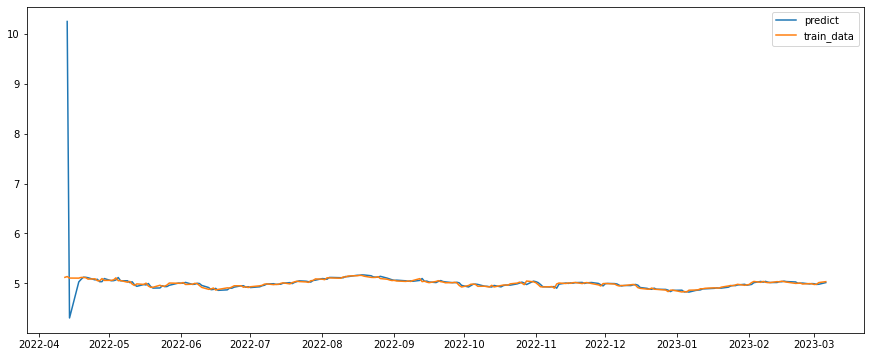

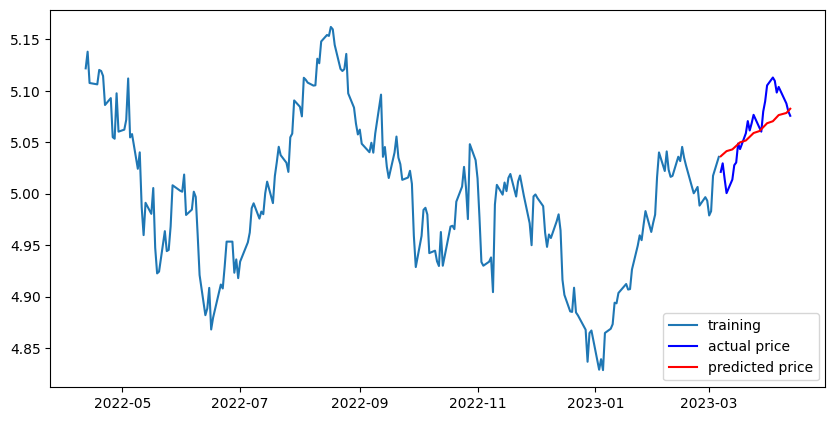

MSE:  11.280048020873789
MAE:  2.7202727421941493
RMSE:  3.3585782737452745
MAPE: 1.71%


In [45]:
arima_result(1,3,2)

d = 3ÏúºÎ°ú Ïò¨Î†§Ï§¨ÎçîÎãà MAPEÍ∞Ä 2% Îñ®Ïñ¥Ï°åÍ≥† Í∑∏ÎûòÌîÑÎèÑ Ï†úÎ≤ï Í∑∏Îü¥Ïã∏Ìï¥ Î≥¥Ïù∏Îã§ üòÄ

#### **ARIMA(1,3,3)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 3, 3)   Log Likelihood                 519.507
Date:                Sun, 16 Apr 2023   AIC                          -1029.014
Time:                        08:13:03   BIC                          -1012.001
Sample:                             0   HQIC                         -1022.145
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9204      0.037    -24.601      0.000      -0.994      -0.847
ma.L1         -0.9787      0.530     -1.847      0.065      -2.018       0.060
ma.L2         -0.9992      1.017     -0.982      0.3

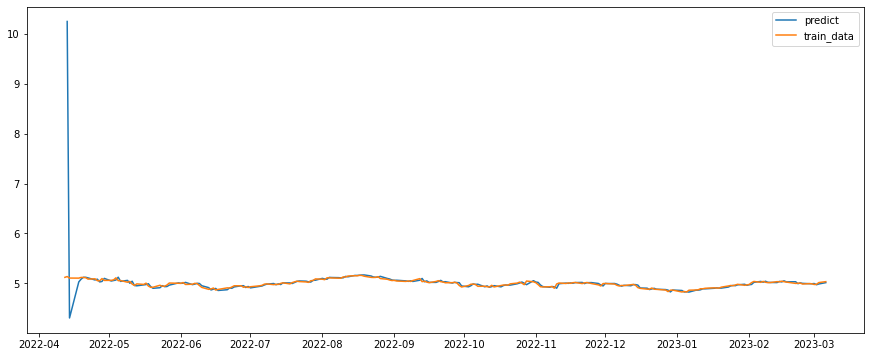

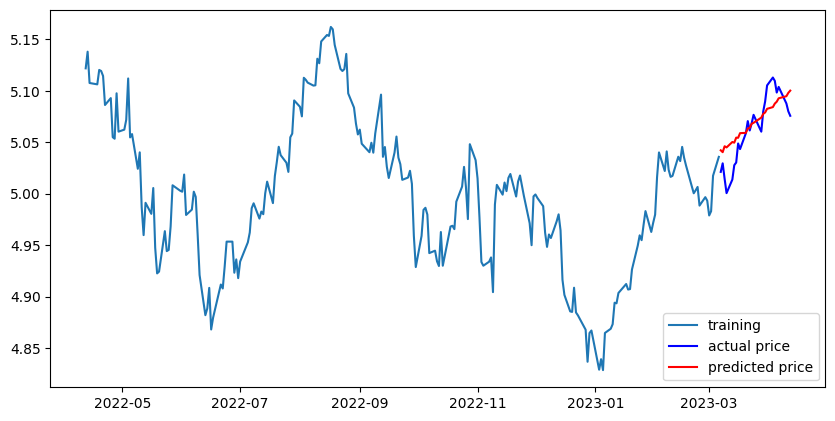

MSE:  9.159012507235818
MAE:  2.474708102610008
RMSE:  3.0263860472906985
MAPE: 1.58%


In [46]:
arima_result(1,3,3)

|p|d|q|MAPE(%)|
|------|---|---|---|
|1|1|0|3.55|
|1|1|1|3.83|
|1|1|2|3.69|
|1|2|2|3.82|
|1|3|2|1.71|
|1|3|3|1.58|

**ARIMA(1,3,3) Î™®Îç∏Ïù¥ MAPE 1.58%Î°ú Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.**

### **JPMorgan**
#### **1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ** 

In [47]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨ÏôÄÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JPM.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-18  125.669998  129.240005  125.540001  128.460007  124.303581   
2022-04-19  128.449997  131.320007  128.229996  131.119995  126.877502   
2022-04-20  132.520004  133.509995  131.339996  131.580002  127.322639   
2022-04-21  132.220001  132.809998  129.960007  130.559998  126.335632   
2022-04-22  130.279999  130.520004  126.690002  126.809998  122.706970   

              Volume  
Date                  
2022-04-18  11834400  
2022-04-19  15015400  
2022-04-20  13430200  
2022-04-21  12174200  
2022-04-22  14318800

In [48]:
# Time Series ÏÉùÏÑ±
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2022-04-18    128.460007
2022-04-19    131.119995
2022-04-20    131.580002
2022-04-21    130.559998
2022-04-22    126.809998
Name: Close, dtype: float64

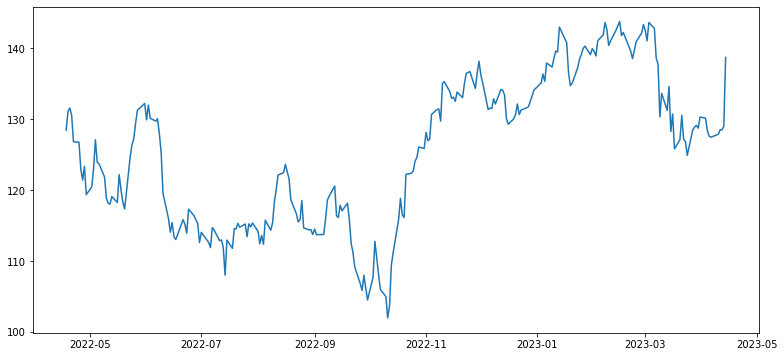

In [49]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
rcParams['figure.figsize'] = 13, 6
plt.plot(ts)

#### **2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ**

In [50]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

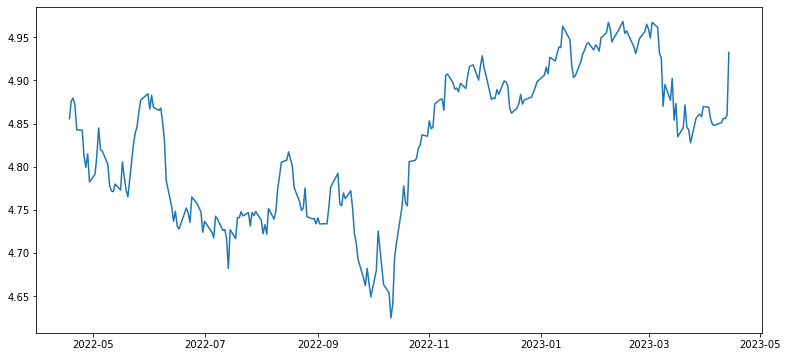

In [51]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)
plt.plot(ts_log)

#### **3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù**

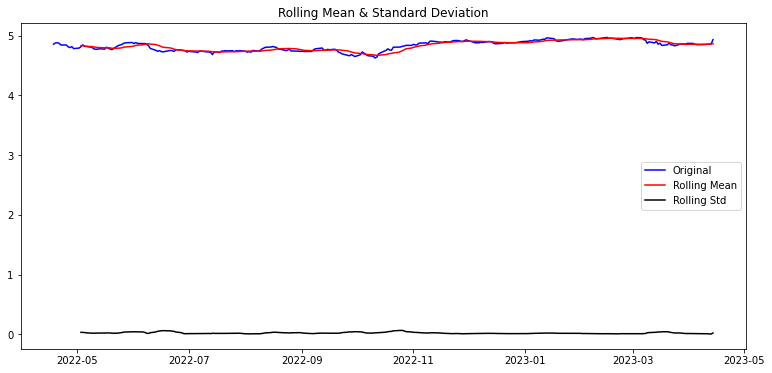

Results of Dickey-Fuller Test:
Test Statistic                  -1.515639
p-value                          0.525761
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


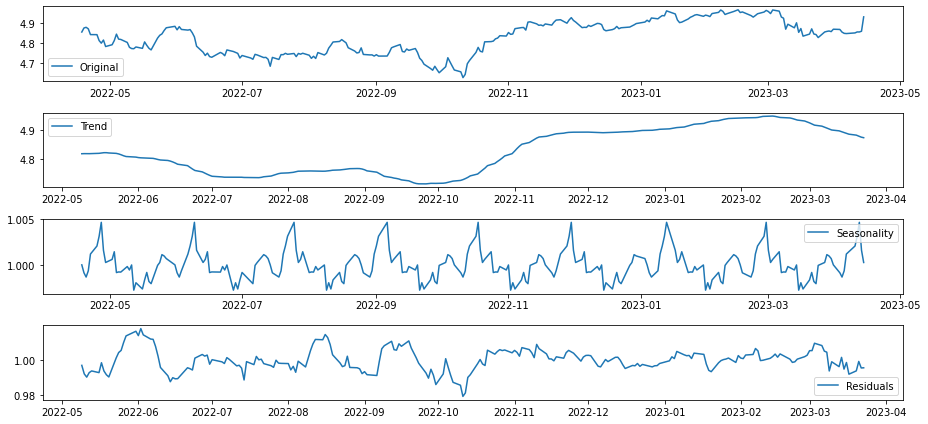

In [52]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

# Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [53]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.972020
p-value                          0.000025
#Lags Used                       2.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


#### **4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±**

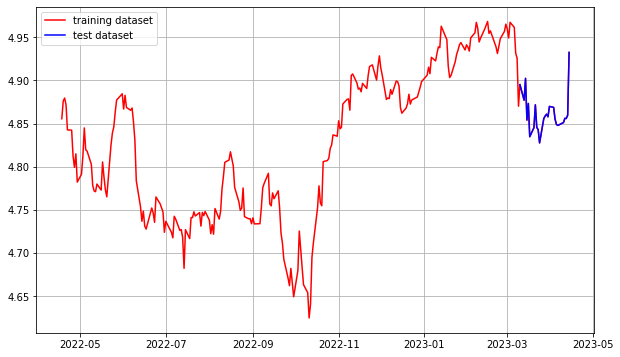

In [54]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

#### **5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞**

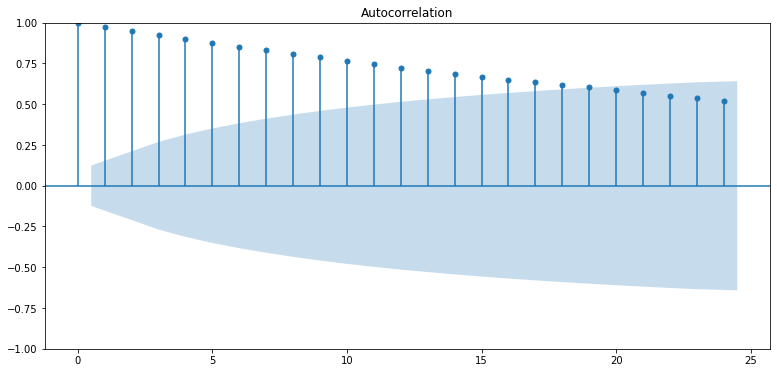

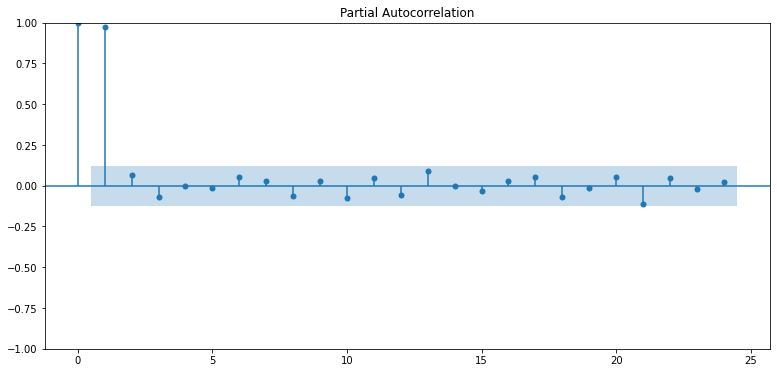

In [55]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(ts_log)  
plot_pacf(ts_log, method='ywm')
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.531059e+01
p-value                        4.191708e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


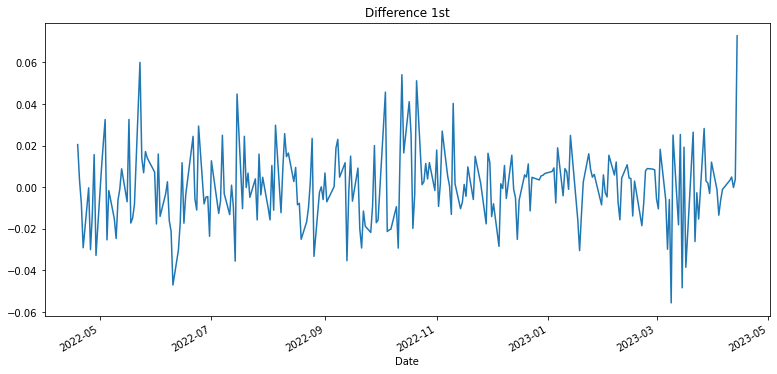

In [56]:
# 1Ï∞® Ï∞®Î∂Ñ
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

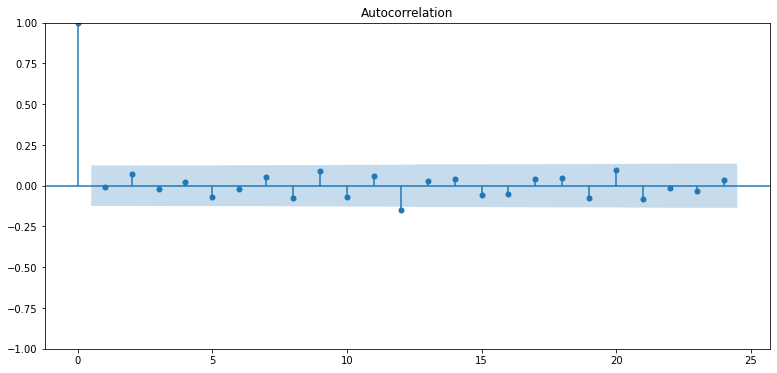

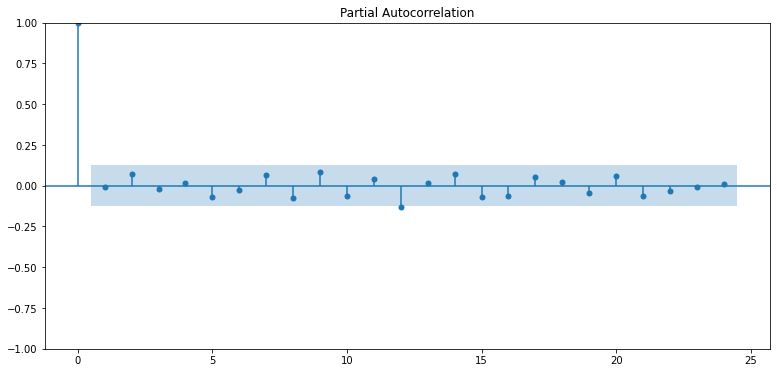

In [57]:
# 1Ï∞® Ï∞®Î∂Ñ ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(diff_1)
plot_pacf(diff_1, method='ywm')
plt.show()

2Ï∞® Ï∞®Î∂ÑÍπåÏßÄ ÏßÑÌñâ Ïïà Ìï¥ÎèÑ Îê† Í≤É Í∞ôÏßÄÎßå Í∂ÅÍ∏àÌïòÎãàÍπê ÌïúÎ≤à Ìï¥Î≥¥Í∏∞Î°ú ÌñàÎã§.

Results of Dickey-Fuller Test:
Test Statistic                -7.225428e+00
p-value                        2.059048e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


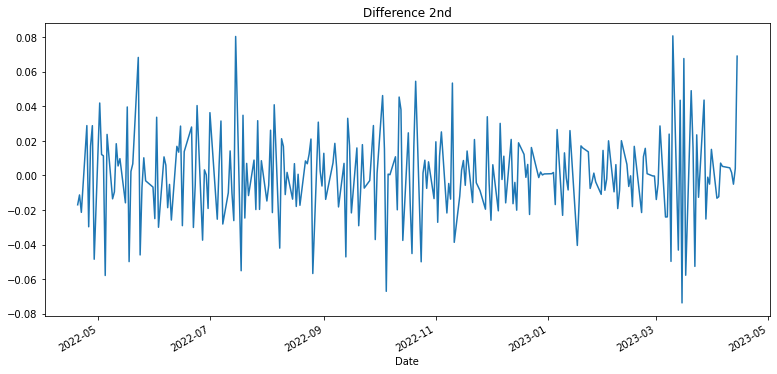

In [58]:
# 2Ï∞® Ï∞®Î∂Ñ
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

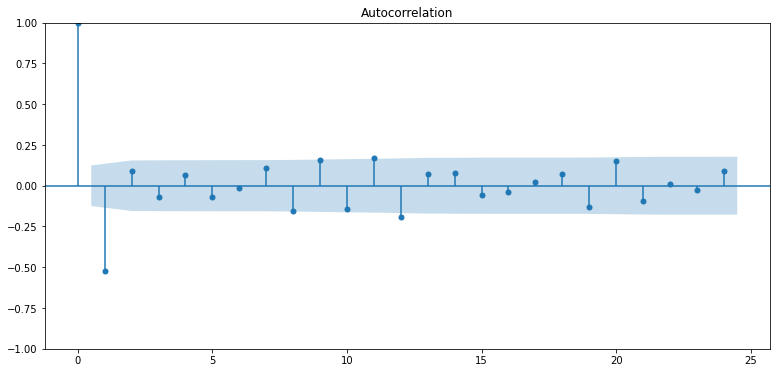

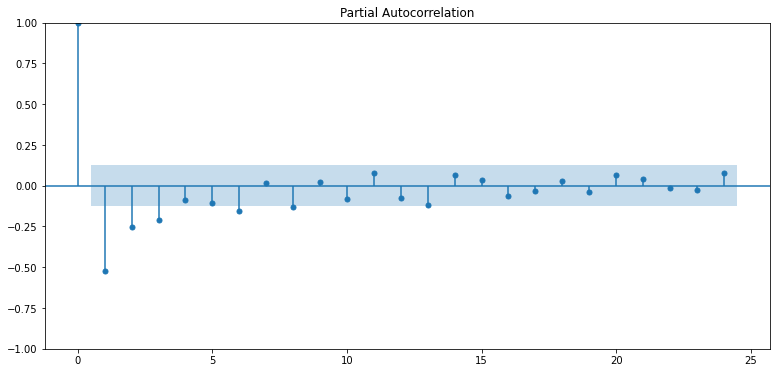

In [59]:
# 2Ï∞® Ï∞®Î∂Ñ ACF, PACF Í∑∏Î†§Î≥¥Í∏∞
plot_acf(diff_2)
plot_pacf(diff_2, method='ywm')
plt.show()

2Ï∞® Ï∞®Î∂ÑÏùÑ Ìï¥Î≥∏ Í≤∞Í≥º, PACFÎ•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ boundaryÎ•º ÎÑòÏñ¥Í∞ÄÎäî Í∞íÎì§Ïù¥ ÏÉùÍ∏¥ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
<br>**ARIMA(1,0,q)ÏôÄ ARIMA(1,1,q) Î™®Îç∏ÏùÑ Ï†ÅÏö©ÏãúÏºú Í∞íÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ Î™®Îç∏Ïùò ÏòàÏ∏° Îä•Î†•ÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÏûê.**

#### **6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏**

#### **ARIMA(1,0,0)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 590.076
Date:                Sun, 16 Apr 2023   AIC                          -1174.152
Time:                        08:13:08   BIC                          -1163.904
Sample:                             0   HQIC                         -1170.016
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8243      0.062     78.202      0.000       4.703       4.945
ar.L1          0.9800      0.014     70.360      0.000       0.953       1.007
sigma2         0.0003   2.67e-05     11.386      0.0

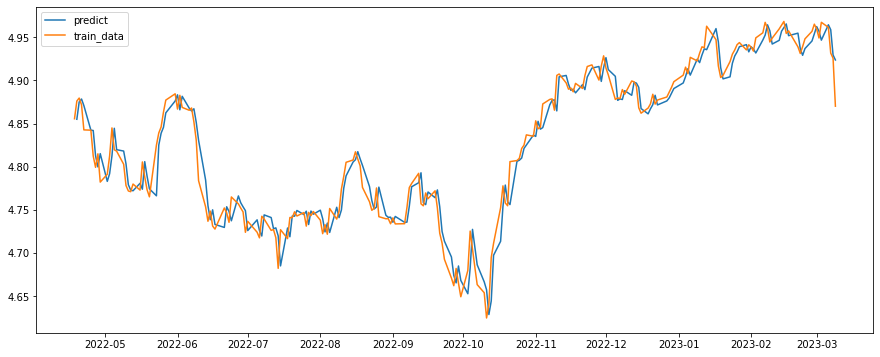

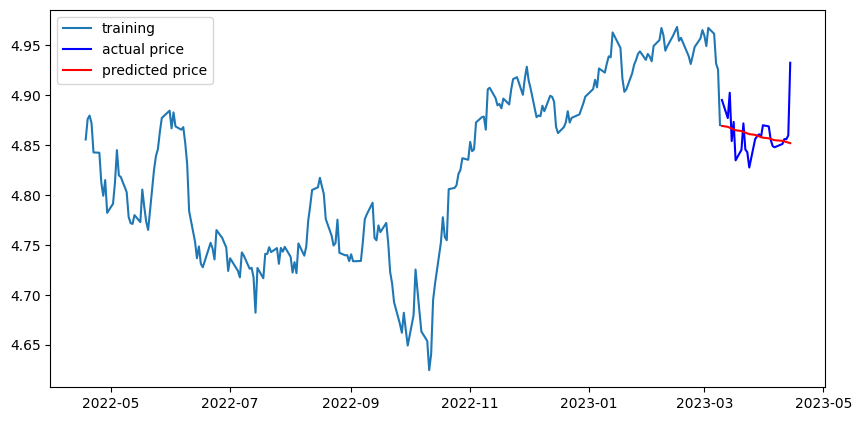

MSE:  8.47666781586344
MAE:  1.8677320590753124
RMSE:  2.911471761131033
MAPE: 1.42%


In [60]:
arima_result(1,0,0)

#### **ARIMA(1,0,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 591.008
Date:                Sun, 16 Apr 2023   AIC                          -1174.017
Time:                        08:13:08   BIC                          -1160.352
Sample:                             0   HQIC                         -1168.502
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8336      0.058     83.641      0.000       4.720       4.947
ar.L1          0.9757      0.015     64.856      0.000       0.946       1.005
ma.L1          0.0867      0.069      1.265      0.2

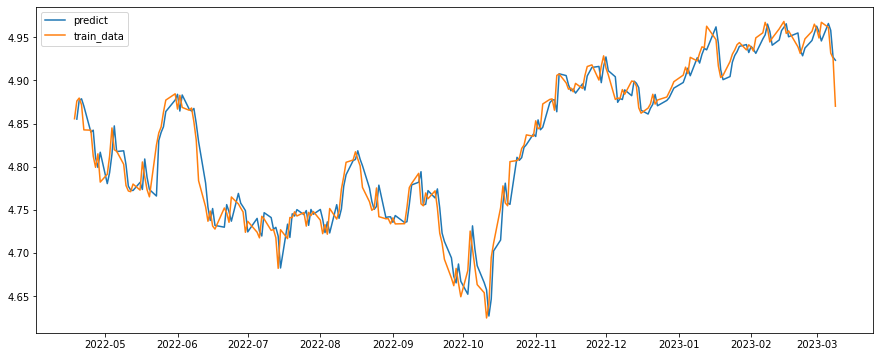

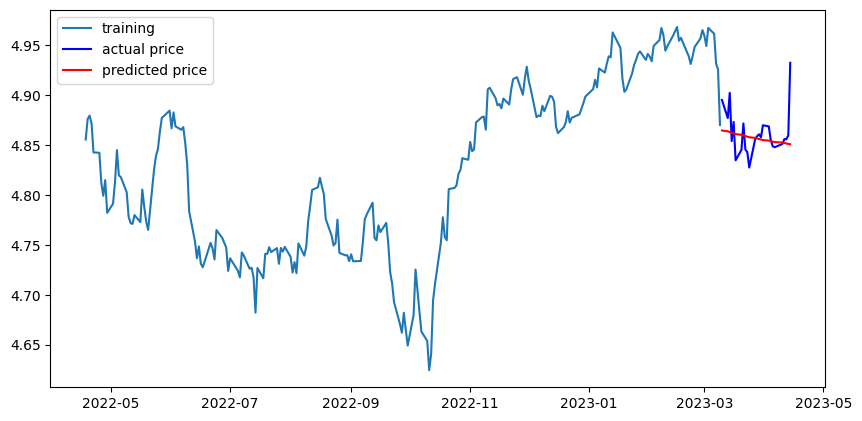

MSE:  8.694237742239123
MAE:  1.9067198250662756
RMSE:  2.9485992847857645
MAPE: 1.45%


In [61]:
arima_result(1,0,1)

#### **ARIMA(1,0,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 591.169
Date:                Sun, 16 Apr 2023   AIC                          -1172.338
Time:                        08:13:10   BIC                          -1155.258
Sample:                             0   HQIC                         -1165.445
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8329      0.057     84.438      0.000       4.721       4.945
ar.L1          0.9744      0.016     62.015      0.000       0.944       1.005
ma.L1          0.0874      0.068      1.279      0.2

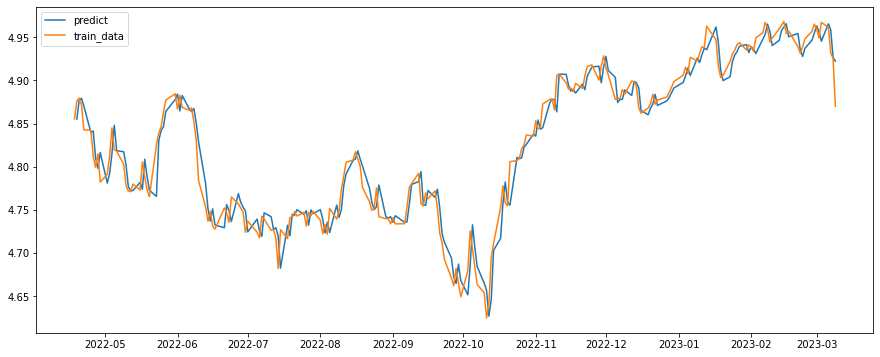

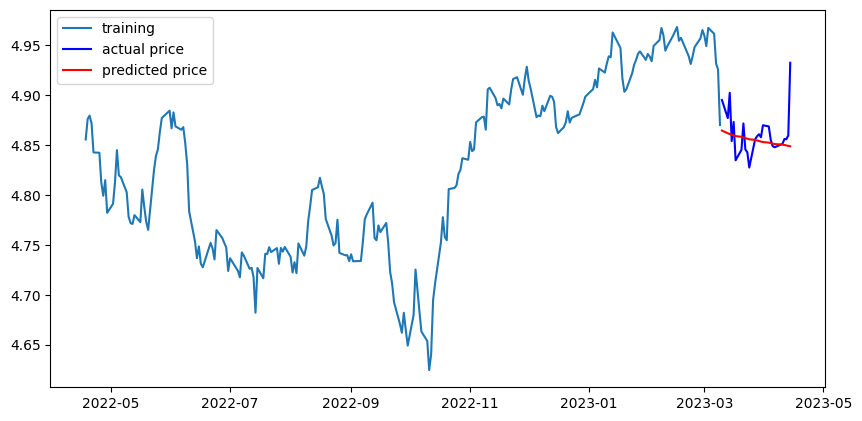

MSE:  9.010290703203898
MAE:  1.9592823481744142
RMSE:  3.0017146272095716
MAPE: 1.49%


In [62]:
arima_result(1,0,2)

#### **ARIMA(1,1,0)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 588.249
Date:                Sun, 16 Apr 2023   AIC                          -1172.498
Time:                        08:13:10   BIC                          -1165.675
Sample:                             0   HQIC                         -1169.744
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0824      0.066      1.241      0.215      -0.048       0.212
sigma2         0.0003   2.38e-05     12.850      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

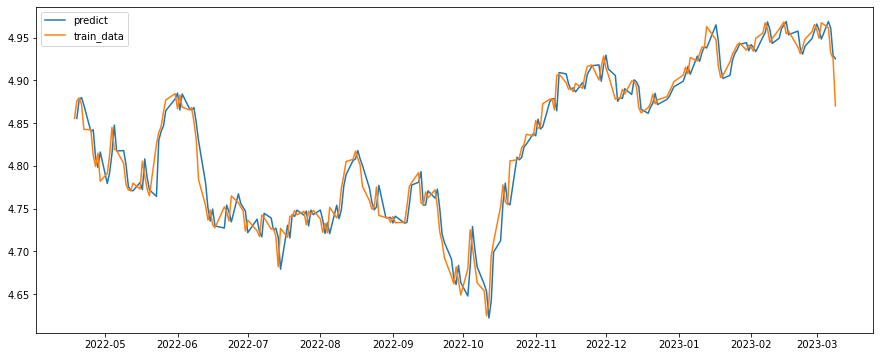

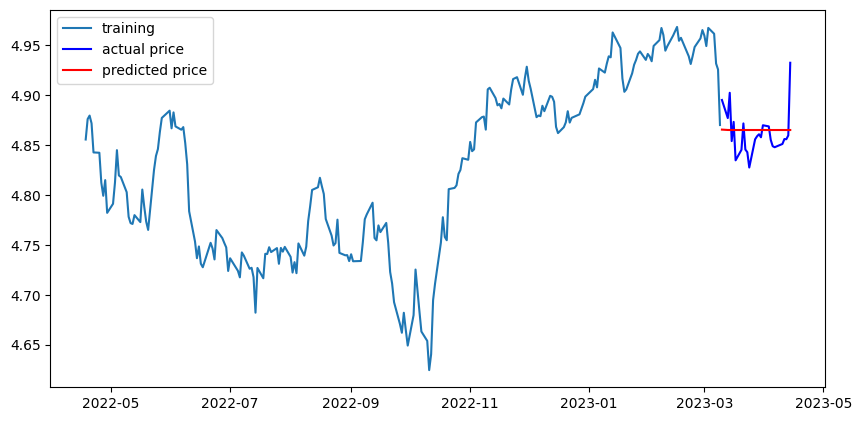

MSE:  8.308872023959841
MAE:  2.175084518234119
RMSE:  2.8825114091638633
MAPE: 1.67%


In [63]:
arima_result(1,1,0)

#### **ARIMA(1,1,1)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 588.271
Date:                Sun, 16 Apr 2023   AIC                          -1170.542
Time:                        08:13:11   BIC                          -1160.307
Sample:                             0   HQIC                         -1166.411
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5552      0.485      1.144      0.253      -0.396       1.507
ma.L1         -0.4760      0.509     -0.936      0.349      -1.473       0.521
sigma2         0.0003   2.38e-05     12.876      0.0

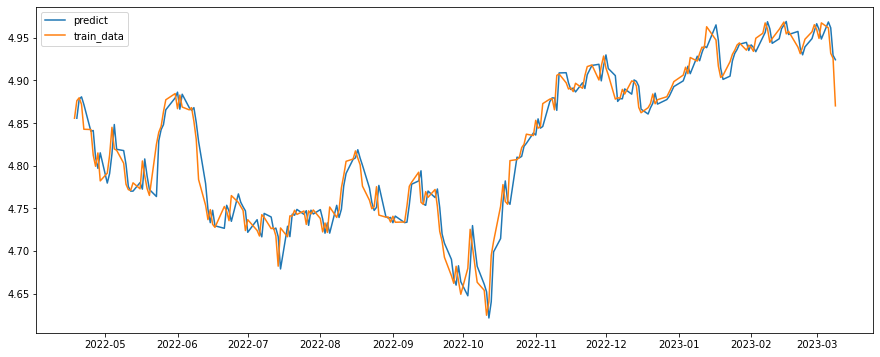

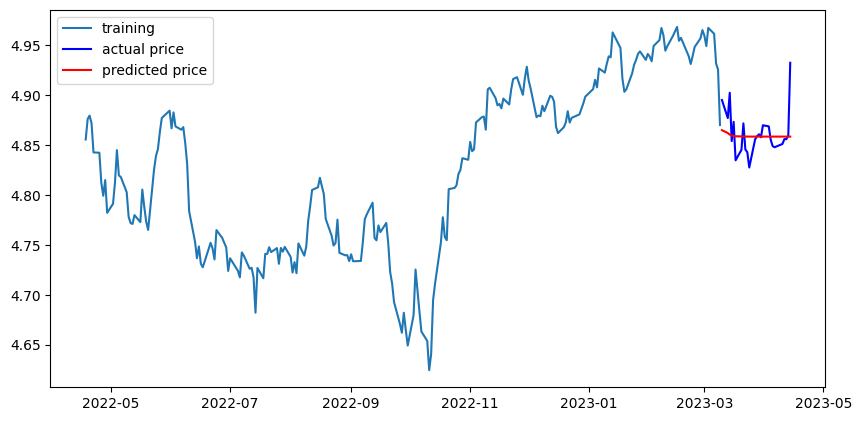

MSE:  7.931423147199044
MAE:  1.8531980152377816
RMSE:  2.8162782439238927
MAPE: 1.41%


In [64]:
arima_result(1,1,1)

#### **ARIMA(1,1,2)**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 588.259
Date:                Sun, 16 Apr 2023   AIC                          -1168.519
Time:                        08:13:12   BIC                          -1154.872
Sample:                             0   HQIC                         -1163.010
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6347      1.564      0.406      0.685      -2.431       3.701
ma.L1         -0.5543      1.550     -0.358      0.721      -3.592       2.484
ma.L2         -0.0316      0.170     -0.186      0.8

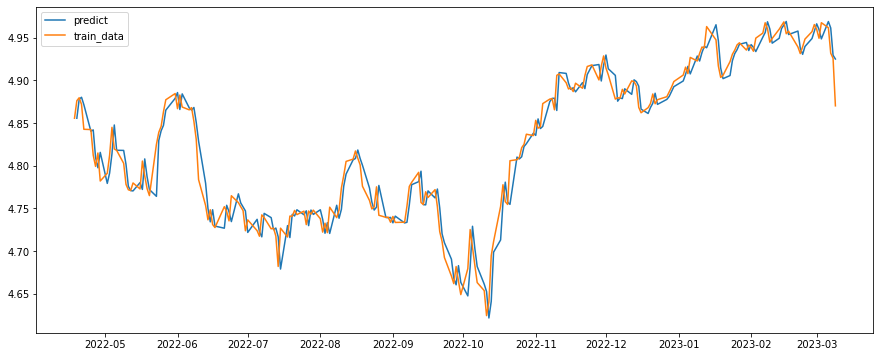

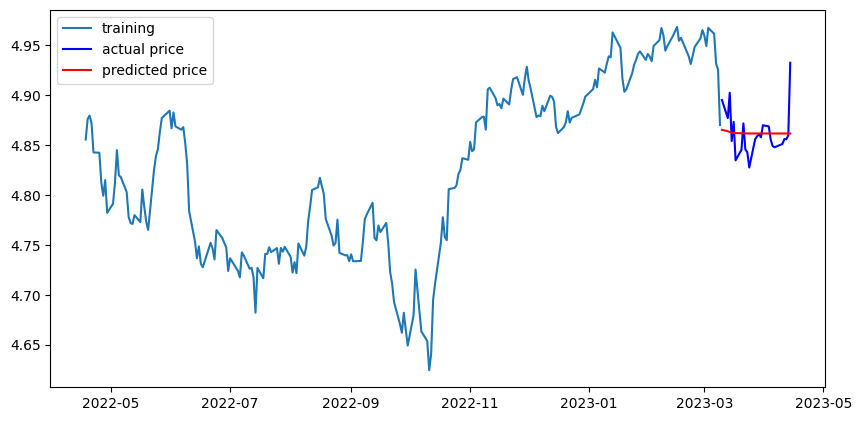

MSE:  7.929196810181704
MAE:  1.9817633807371822
RMSE:  2.8158829539207955
MAPE: 1.51%


In [65]:
arima_result(1,1,2)

|p|d|q|MAPE(%)|
|------|---|---|---|
|1|0|0|1.42|
|1|0|1|1.45|
|1|0|2|1.49|
|1|1|0|1.67|
|1|1|1|1.41|
|1|1|2|1.51|

**ARIMA(1,1,1) Î™®Îç∏Ïù¥ MAPE 1.41%Î°ú ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.**

**ÏµúÏ¢Ö Ï†ïÎ¶¨**

||ARIMA(p,d,q)|MAPE(%)|
|------|---|---|
|Samsung|(2,0,0)|1.02|
|Apple|(1,3,3)|1.58|
|JPMorgan|(1,1,1)|1.41|

---

### **ÌîÑÎ°úÏ†ùÌä∏ ÌöåÍ≥†**
Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî ÏòàÏÉÅÎåÄÎ°ú Ïñ¥Î†§Ïõ†Îã§. ACFÏôÄ PACFÎ•º ÌÜµÌï¥ Ï†ÅÏ†àÌïú Î™®ÏàòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ÏÑú ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÌïòÎÇòÏî© Í∞íÏùÑ Î≥ÄÍ≤ΩÌï¥Ï£ºÎ©∞ Îã§ÏñëÌïú ÏãúÎèÑÎ•º Ìï¥Î≥¥ÏïòÎã§. Í≤∞Í≥ºÏ†ÅÏúºÎ°úÎäî ÏúÑÏôÄ Í∞ôÏù¥ ÏÑ∏ Í∞ÄÏßÄ Ï£ºÏãù Î™®Îëê MAPE Í∞íÏù¥ 1%ÎåÄÎ°ú ÏÉÅÎãπÌûà Ï†ÅÏùÄ Ïò§Ï∞®Ïú®ÏùÑ Í∞ÄÏ†∏ Îß§Ïö∞ ÏÑ±Í≥µÏ†ÅÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§. ÌïòÏßÄÎßå Ï£ºÏãù ÏãúÏû•ÏùÄ Îß§Ïö∞ Î≥µÏû°ÌïòÍ≥† ÏòàÏ∏°ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÏãúÏû•Ïù¥Í∏∞Ïóê ARIMA Î™®Îç∏ ÌïòÎÇòÎßå Í∞ÄÏßÄÍ≥† ÏòàÏ∏°ÌïòÍ∏∞ÏóêÎäî ÎßéÏù¥ Î∂ÄÏ°±ÌïòÍ≥† ÏúÑÌóòÌïòÎã§Îäî ÏÉùÍ∞ÅÏù¥ Îì†Îã§. Ï£ºÏãù ÏãúÏû•ÏóêÏÑúÎäî Í∞êÏÜåÎÇò Ï¶ùÍ∞ÄÌè≠ Î≥ÄÎèôÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏Îì§Ïù¥ Îß§Ïö∞ Îã§ÏñëÌïòÍ≥† Î≥µÏû°ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î•º Î™®Îëê Î∞òÏòÅÌïòÎäî ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÏùÑ Í∞úÎ∞úÌïòÍ∏∞Îäî ÏâΩÏßÄ ÏïäÎã§Í≥† ÌïúÎã§. Í∑∏ÎûòÏÑú ARIMA Î™®Îç∏Î°úÎäî ÎåÄÎûµÏ†ÅÏù∏ Ï∂îÏù¥ ÌôïÏù∏ Ï†ïÎèÑÎßå Í∞ÄÎä•ÌïòÎã§Í≥† Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§. Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Îã§ ÌôúÏö©ÌïòÍ∏¥ ÌñàÏßÄÎßå, Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Í∞ÑÍ≥º ÏñëÏùÑ Í≤∞Ï†ïÌïòÎäî Ï∂îÍ∞ÄÏ†ÅÏù∏ Îã®Í≥ÑÍ∞Ä ÌïÑÏöîÌïòÏßÄ ÏïäÏùÑÍπå Ïã∂Îã§. Ï£ºÏãùÏóê Í¥ÄÏã¨Ïù¥ ÏóÜÏñ¥ÏÑú Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî Ï°∞Í∏à Ìù•ÎØ∏Í∞Ä Îñ®Ïñ¥ÏßÄÎäî Î∂ÄÎ∂ÑÎèÑ ÏûàÏóàÎçò Í≤É Í∞ôÍ≥† Í∑∏ÎûòÏÑú Í∑∏ÎßåÌÅº Îçî Ïñ¥Î†µÍ≤å ÎäêÍª¥ÏßÄÏßÄ ÏïäÏïòÏùÑÍπå Ïã∂Îã§. Î¨¥ÏóáÎ≥¥Îã§ ARIMA Î™®Îç∏Ïù¥ ÌÜµÍ≥ÑÌïô Í∏∞Î∞òÏùò Î™®Îç∏Ïù¥Îùº ÌÜµÍ≥ÑÌïô ÏßÄÏãùÏù¥ ÎßéÏù¥ Î∂ÄÏ°±Ìïú ÎÇòÎ°úÏÑúÎäî ÌïúÍ≥ÑÍ∞Ä ÏûàÏóàÎçò Í≤É Í∞ôÎã§. ÏöîÏ¶ò Ìï† Í≤å ÏÇ∞ÎçîÎØ∏Îùº ÏãúÍ∞ÑÏù¥ ÎÇ†ÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå ÎÇòÏ§ëÏóêÎùºÎèÑ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùÄ Íº≠ Î≥µÏäµÌïòÎèÑÎ°ù ÌïòÏûê!!!

#### **ÏÉàÎ°ú ÏïåÍ≤å Îêú Í≤É!**
* ACF(ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò): ÌòÑÏû¨ ÏãúÏ†êÏóêÏÑú Í≥ºÍ±∞ ÏãúÏ†êÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ìï®Ïàò
* PACF(Ìé∏ÏûêÍ∏∞ÏÉÅÍ¥ÄÌï®Ïàò): ÌòÑÏû¨ ÏãúÏ†êÍ≥º ÏãúÏ∞®(lag) ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóêÏÑú Ï§ëÍ∞ÑÏóê ÎÅºÏñ¥ ÏûàÎäî Î™®Îì† Îã§Î•∏ ÏãúÏ∞®Ïùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞ÌïòÍ≥† ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•ÎßåÏùÑ ÌååÏïÖÌïòÎäî Ìï®Ïàò
* ÏùºÎ∞òÏ†ÅÏúºÎ°ú p, qÎ•º Í∞ÑÍ≤∞Ïùò ÏõêÏπôÏóê Îî∞Îùº p < 3 , q < 3ÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†ÅÏù¥Îã§. (Îã®ÏàúÏÑ±Ïùò ÏõêÎ¶¨)
* p + q < 2, p x q = 0 Ïù∏ Í∞íÎì§ÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïúÎã§. (ÎåÄÎ∂ÄÎ∂ÑÏùò ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏóêÏÑúÎäî ÌïòÎÇòÏùò Í≤ΩÌñ•ÎßåÏùÑ Í∞ïÌïòÍ≤å ÎùÑÍ∏∞ ÎïåÎ¨∏Ïóê ÌïòÎÇòÏùò Î™®ÏàòÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌïúÎã§)
* Ï∞®Î∂Ñ dÏùò Í≤ΩÏö∞ Ï†ïÏÉÅÏÑ±(Ìä∏ÎûúÎìúÍ∞Ä ÏóÜÎäî ÏÉÅÌÉú)ÏùÑ ÎßåÏ°±ÏãúÌÇ§Îäî ÎßåÌÅº Ï∞®Î∂ÑÌï¥Ï£ºÎ©¥ ÎêúÎã§.
* ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞Ïóî 1Ï∞® Ï∞®Î∂ÑÎßåÏúºÎ°ú Ï†ïÏÉÅÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ïù¥ ÎßåÎì§Ïñ¥ÏßÑÎã§. (2Ï∞® Ïù¥ÏÉÅ Ï∞®Î∂ÑÏùÑ Ìï† Í≤ΩÏö∞ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©Ìïú Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•Ïù¥ ÎÇÆÏïÑÏßÑÎã§)

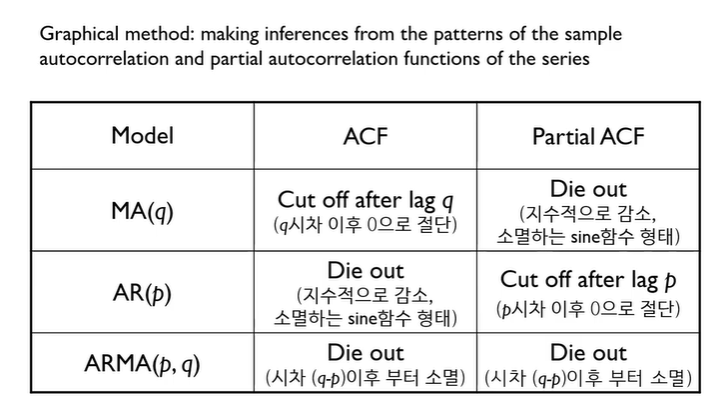

#### **Í∂ÅÍ∏àÌïú Ï†ê ü§î**
MAPE Í∞íÏùÄ Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥ÎèÑ Í∑∏ÎûòÌîÑÏóêÏÑúÎäî ÌÅ∞ Ï∞®Ïù¥Î•º Î≥¥Ïùº ÏàòÍ∞Ä ÏûàÎäî Í≤ÉÏùºÍπå? Í∑∏Î†áÎã§Î©¥ Ïôú???
<br>Ïù¥Î∂ÄÎ∂ÑÏùÄ ÏïÑÎ¨¥ÎûòÎèÑ Îçî ÏïåÏïÑÎ¥êÏïº Ìï† Í≤É Í∞ôÎã§. (ÎãµÎãµ)

**Ï∞∏Í≥†Ìïú Î†àÌçºÎü∞Ïä§**
<br>[python] ARIMA Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞è Î™®Ìòï Ï†ÅÌï© Ï†àÏ∞® https://hwao-story.tistory.com/13
<br>ARIMA, PythonÏúºÎ°ú ÌïòÎäî ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù (feat. ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤©ÏòàÏ∏°) https://byeongkijeong.github.io/ARIMA-with-Python/
<br>ÏãúÍ≥ÑÏó¥ Ï†ïÏÉÅÏÑ± (Stationarity), Îì§Ïñ¥Î¥§Îãà? ‚Äì ÏïåÏïÑÎ≥¥Ïûê ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Episode 2 https://modulabs.co.kr/blog/time-series-stationarity/
<br>ARIMA Î™®Îç∏ Í∞úÏöî - Part 2 https://www.youtube.com/watch?v=P_3808Xv76Q&t=791s
<br>ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù - ARIMA Î™®Îç∏ https://velog.io/@sjina0722/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D-ARIMA-%EB%AA%A8%EB%8D%B8